In [1]:
### uses sheet 1 from scb and  sheet åldersgrupp from fhm

#fhm_age_grp = pd.read_csv('fhm_dead_age_grp.csv',sep=';')

#fhm_dead = pd.read_csv('fhm_scb_dead.csv',sep=';',header=0,index_col=0,parse_dates=True,names=['fhm_dead'])

## NOTE! - assuming population 2020 grows as it did 2918-2019
## other prg's use mean of two consequtive years, or pop year before
## therefore this shows slightly different than eg scb_population

#### !!!!! ANOMALY in SCB data: historical death data for (at least ) 2019 from statistikdatabasen 
# http://www.statistikdatabasen.scb.se/pxweb/sv/ssd/START__BE__BE0101__BE0101G/ManadFoddDod/table/tableViewLayout1/
# does not concur with death data 2019 in the preliminary data! 

### DUE to okänd dödsdag when using the daily data of the preliminary stuff - much more okänd dag than okänd månad in 
### the monthly stuff
####

# ALL DATA BASED ON SCB PREL DATA IGNORES THOSE WITH UNKNOWN DAY OF DEATH !!!

#### BEFORE USING, check that scb and fhm have about same number of days of data

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests

sns.set()


In [2]:
def parse_scb_prel():
    
    def monthname2number(m):
        if m == 'januari' : return 1
        if m == 'februari' : return 2
        if m == 'mars' : return 3
        if m == 'april' : return 4
        if m == 'maj' : return 5
        if m == 'juni' : return 6
        if m == 'juli' : return 7
        if m == 'augusti' : return 8
        if m == 'september' : return 9
        if m == 'oktober' : return 10
        if m == 'november' : return 11
        if m == 'december' : return 12

    df = pd.read_csv('scb-dead_per_day.csv',sep=';',usecols=[1,2,3,4,5,6,7,10,11],thousands=',')
    
    df['month'] = df['Månad'].apply(monthname2number)
    df[['Månad','month']] = df[['Månad','month']].replace(np.nan,0)
    df['month'] = df['month'].astype(int)
    
    df[['2015','2016','2017','2018','2019','2020','2015-2019']] = \
    df[['2015','2016','2017','2018','2019','2020','2015-2019']].astype(int)

    
    unknown_death_day = df.iloc[-1,:7]
    
    df.drop(366,inplace=True)
    
    df = df.loc[df['2020'] != 0]
    
    #df = df.drop('Månad',axis=1)
    
    index = pd.date_range('2020-01-01',periods=len(df))
    df.index = index
    
    known_death_day = df.iloc[:,:7].sum()
    
    year_fraction = len(df) / 366
    
    unknown_death_day[['2015','2016','2017','2018','2019','2015-2019']] = unknown_death_day[
    ['2015','2016','2017','2018','2019','2015-2019']] * year_fraction
    
    dead_pct_per_day = df[['2015','2016','2017','2018','2019','2020','2015-2019']] / known_death_day
    
    all_deaths = df[['2015','2016','2017','2018','2019','2020','2015-2019']] + unknown_death_day * dead_pct_per_day
    
    all_deaths = pd.concat([all_deaths,df[['Månad','Dag']]],axis=1)
    
    return all_deaths

In [3]:
scb_deaths = parse_scb_prel()
scb_deaths.rename(columns={'Dag' :'day'},inplace=True)
scb_deaths

,2015,2016,2017,2018,2019,2020,2015-2019,Månad,day
2020-01-01,298.096,250.41,347.359,282.558,309.147,260.7,297.655,januari,1
2020-01-02,274.855,278.006,324.817,320.575,284.415,307.913,296.632,januari,2
2020-01-03,283.949,299.47,317.644,303.108,279.263,262.753,296.632,januari,3
2020-01-04,258.687,265.741,312.521,292.833,290.598,279.175,284.358,januari,4
2020-01-05,270.813,265.741,311.496,298.998,283.385,271.99,286.404,januari,5
...,...,...,...,...,...,...,...,...,...
2020-08-24,215.236,232.013,231.573,218.854,233.921,168.326,226.054,augusti,24
2020-08-25,220.288,243.256,230.548,216.799,231.86,157.036,228.1,augusti,25
2020-08-26,219.278,239.167,208.006,218.854,229.799,96.4795,222.986,augusti,26
2020-08-27,217.257,235.079,210.055,190.085,248.348,35.9232,219.917,augusti,27


In [4]:
def translate_month(m):
    if m == 'januari' : return  'January'
    if m == 'februari' : return 'February'
    if m == 'mars' : return 'March'
    if m == 'april' : return 'April'
    if m == 'maj' : return 'May'
    if m == 'juni' : return 'June'
    if m == 'juli' : return 'July'
    if m == 'augusti' : return 'August'
    if m == 'september' : return 'September'
    if m == 'oktober' : return 'October'
    if m == 'november' : return 'November'
    if m == 'december' : return 'December'
    
    
scb_deaths['month'] = scb_deaths['Månad'].apply(translate_month)

scb_deaths = scb_deaths.drop('Månad',axis=1)


scb_deaths.rename(columns={'Dag' : 'day'},inplace=True)
scb_deaths['year'] = '2020'

scb_deaths['day'] = scb_deaths['day'].astype(str)
    


In [5]:
pd.datetime.strptime('2020'+ '-'+'January'+'-'+'31','%Y-%B-%d')

<ipython-input-5-cab3d0352104>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pd.datetime.strptime('2020'+ '-'+'January'+'-'+'31','%Y-%B-%d')


datetime.datetime(2020, 1, 31, 0, 0)

In [6]:
def fix_date(s):
    return pd.datetime.strptime('2020'+'-'+s.month+'-'+s.day,'%Y-%B-%d')

scb_deaths['date'] = scb_deaths.apply(lambda row : fix_date(row),axis=1)

<ipython-input-6-73ffea7828df>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  return pd.datetime.strptime('2020'+'-'+s.month+'-'+s.day,'%Y-%B-%d')


In [7]:
scb_deaths['date'] = pd.to_datetime(scb_deaths['date'])

In [8]:
scb_deaths = scb_deaths.set_index('date')

In [9]:
scb_deaths.drop(['day','month','year'],inplace=True,axis=1)

In [10]:
last_day_mask = scb_deaths['2020'] != 0
scb_deaths = scb_deaths[last_day_mask]

scb_deaths

,2015,2016,2017,2018,2019,2020,2015-2019
date,,,,,,,
2020-01-01,298.096,250.41,347.359,282.558,309.147,260.7,297.655
2020-01-02,274.855,278.006,324.817,320.575,284.415,307.913,296.632
2020-01-03,283.949,299.47,317.644,303.108,279.263,262.753,296.632
2020-01-04,258.687,265.741,312.521,292.833,290.598,279.175,284.358
2020-01-05,270.813,265.741,311.496,298.998,283.385,271.99,286.404
...,...,...,...,...,...,...,...
2020-08-24,215.236,232.013,231.573,218.854,233.921,168.326,226.054
2020-08-25,220.288,243.256,230.548,216.799,231.86,157.036,228.1
2020-08-26,219.278,239.167,208.006,218.854,229.799,96.4795,222.986


In [11]:
last_day = scb_deaths.index[-1].date()
print (last_day)
last_stable_day = (last_day - pd.DateOffset(days=7)).date()
last_stable_day

2020-08-28


datetime.date(2020, 8, 21)

In [12]:
scb_deaths['excess'] = scb_deaths['2020'] - scb_deaths['2015-2019']
scb_deaths['cumexcess'] = scb_deaths['excess'].cumsum()
scb_deaths['excess_19'] = scb_deaths['2019'] - scb_deaths['2015-2019']
scb_deaths['cumexcess_19'] = scb_deaths['excess_19'].cumsum()
scb_deaths_orig = scb_deaths.copy()
scb_deaths

,2015,2016,2017,2018,2019,2020,2015-2019,excess,cumexcess,excess_19,cumexcess_19
date,,,,,,,,,,,
2020-01-01,298.096,250.41,347.359,282.558,309.147,260.7,297.655,-36.9553,-36.9553,11.4917,11.4917
2020-01-02,274.855,278.006,324.817,320.575,284.415,307.913,296.632,11.2809,-25.6744,-12.2172,-0.725529
2020-01-03,283.949,299.47,317.644,303.108,279.263,262.753,296.632,-33.8797,-59.5541,-17.3697,-18.0952
2020-01-04,258.687,265.741,312.521,292.833,290.598,279.175,284.358,-5.18321,-64.7373,6.24018,-11.855
2020-01-05,270.813,265.741,311.496,298.998,283.385,271.99,286.404,-14.4136,-79.1509,-3.01899,-14.874
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-24,215.236,232.013,231.573,218.854,233.921,168.326,226.054,-57.7284,4057.59,7.86685,-2382.23
2020-08-25,220.288,243.256,230.548,216.799,231.86,157.036,228.1,-71.0643,3986.52,3.76012,-2378.47
2020-08-26,219.278,239.167,208.006,218.854,229.799,96.4795,222.986,-126.506,3860.02,6.8135,-2371.66


In [13]:
scb_deaths.sum()['2019'] - scb_deaths.sum()['2015-2019']

-2330.256830601109

In [14]:
scb_deaths = scb_deaths.loc[:last_stable_day].copy()
scb_deaths

,2015,2016,2017,2018,2019,2020,2015-2019,excess,cumexcess,excess_19,cumexcess_19
date,,,,,,,,,,,
2020-01-01,298.096,250.41,347.359,282.558,309.147,260.7,297.655,-36.9553,-36.9553,11.4917,11.4917
2020-01-02,274.855,278.006,324.817,320.575,284.415,307.913,296.632,11.2809,-25.6744,-12.2172,-0.725529
2020-01-03,283.949,299.47,317.644,303.108,279.263,262.753,296.632,-33.8797,-59.5541,-17.3697,-18.0952
2020-01-04,258.687,265.741,312.521,292.833,290.598,279.175,284.358,-5.18321,-64.7373,6.24018,-11.855
2020-01-05,270.813,265.741,311.496,298.998,283.385,271.99,286.404,-14.4136,-79.1509,-3.01899,-14.874
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-17,212.204,214.637,216.203,230.157,214.342,218.618,217.871,0.747077,4185.61,-3.5295,-2384.7
2020-08-18,212.204,233.035,240.795,197.277,221.555,247.357,220.94,26.417,4212.03,0.615319,-2384.09
2020-08-19,243.53,217.704,252.066,209.607,212.281,208.355,227.077,-18.7225,4193.31,-14.7963,-2398.88


In [15]:
scb_deaths.sum()

2015             59363.628064
2016             58224.973240
2017             59477.302243
2018             60311.315064
2019             56578.017457
2020             63137.631608
2015-2019        58985.868214
excess            4151.763395
cumexcess       387771.943009
excess_19        -2407.850757
cumexcess_19   -368575.910541
dtype: float64

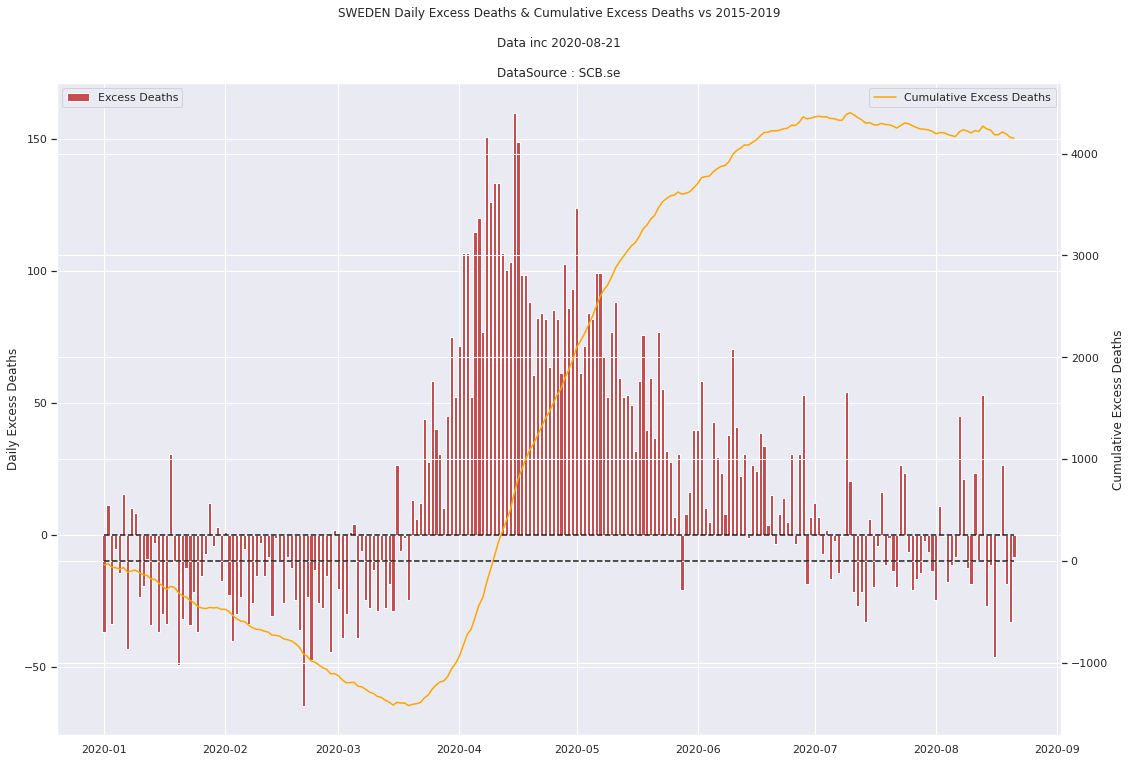

In [16]:

plt.figure(figsize=(18,12))
plt.title('SWEDEN Daily Excess Deaths & Cumulative Excess Deaths vs 2015-2019\n\nData inc {}\n\n'.format(last_stable_day)+\
         'DataSource : SCB.se')
ax = plt.gca()
ax2 = plt.twinx()
ax.bar(scb_deaths.index,scb_deaths['excess'],color='r',label='Excess Deaths')
ax.plot(scb_deaths.index,[0] * len(scb_deaths.index),color='k',ls='dashed')

ax2.plot(scb_deaths.index,scb_deaths['cumexcess'],color='orange',label='Cumulative Excess Deaths')
ax2.plot(scb_deaths.index,[0] * len(scb_deaths.index),color='k',ls='dashed')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

ax.set_ylabel('Daily Excess Deaths')
ax2.set_ylabel('Cumulative Excess Deaths')
plt.savefig('fhm_scb_excess.jpg',format='jpg')

In [17]:
### population 2015-2019
url = 'http://api.scb.se/OV0104/v1/doris/sv/ssd/START/BE/BE0101/BE0101A/BefolkningR1860'
data = {
  "query": [
    {
      "code": "Alder",
      "selection": {
        "filter": "vs:ÅlderTotA",
        "values": []
      }
    },
    {
      "code": "Kon",
      "selection": {
        "filter": "item",
        "values": [
          "1",
          "2"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2014",  
          "2015",
          "2016",
          "2017",
          "2018",
          "2019"
        ]
      }
    }
  ],
  "response": {
    "format": "json"
  }
}

In [18]:
r = requests.post(url,json=data)
r.status_code

200

In [19]:
json = r.json()

In [20]:
json['data'][0]

{'key': ['1', '2014'], 'values': ['4872240']}

In [21]:
data_list = []

for rec in range(len(json['data'])):
    data_list.append((json['data'][rec]['key'][0],json['data'][rec]['key'][1],json['data'][rec]['values'][0]))

In [22]:
population = pd.DataFrame(data_list,columns=['gender','year','population'])
population = population.set_index('year')
population['population'] = population['population'].astype(int)

In [23]:
population

,gender,population
year,,
2014,1,4872240
2015,1,4930966
2016,1,5013347
2017,1,5082662
2018,1,5142438
2019,1,5195814
2014,2,4875115
2015,2,4920051
2016,2,4981806


In [24]:
population = population.groupby(population.index).sum()
population['growth'] = population['population'] / population['population'].shift()


population.loc['2020','population'] = population.loc['2019','population']  
population['population'] = population['population'].astype(int)
population

,population,growth
year,,
2014,9747355,NaN
2015,9851017,1.010635
2016,9995153,1.014632
2017,10120242,1.012515
2018,10230185,1.010864
2019,10327589,1.009521
2020,10327589,NaN


In [25]:
scb_deaths_ytd = scb_deaths.sum()
scb_deaths_ytd = scb_deaths_ytd.drop(['2015-2019','excess','cumexcess'])
scb_deaths_ytd

2015             59363.628064
2016             58224.973240
2017             59477.302243
2018             60311.315064
2019             56578.017457
2020             63137.631608
excess_19        -2407.850757
cumexcess_19   -368575.910541
dtype: float64

In [26]:
deaths_per_M_ytd = scb_deaths_ytd / (population['population'] / 1e6)
deaths_per_M_ytd.drop('2014',inplace=True)
deaths_per_M_ytd

2015            6026.142079
2016            5825.320857
2017            5877.063240
2018            5895.427606
2019            5478.337437
2020            6113.491891
cumexcess_19            NaN
excess_19               NaN
dtype: float64

In [27]:
scb_deaths

,2015,2016,2017,2018,2019,2020,2015-2019,excess,cumexcess,excess_19,cumexcess_19
date,,,,,,,,,,,
2020-01-01,298.096,250.41,347.359,282.558,309.147,260.7,297.655,-36.9553,-36.9553,11.4917,11.4917
2020-01-02,274.855,278.006,324.817,320.575,284.415,307.913,296.632,11.2809,-25.6744,-12.2172,-0.725529
2020-01-03,283.949,299.47,317.644,303.108,279.263,262.753,296.632,-33.8797,-59.5541,-17.3697,-18.0952
2020-01-04,258.687,265.741,312.521,292.833,290.598,279.175,284.358,-5.18321,-64.7373,6.24018,-11.855
2020-01-05,270.813,265.741,311.496,298.998,283.385,271.99,286.404,-14.4136,-79.1509,-3.01899,-14.874
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-17,212.204,214.637,216.203,230.157,214.342,218.618,217.871,0.747077,4185.61,-3.5295,-2384.7
2020-08-18,212.204,233.035,240.795,197.277,221.555,247.357,220.94,26.417,4212.03,0.615319,-2384.09
2020-08-19,243.53,217.704,252.066,209.607,212.281,208.355,227.077,-18.7225,4193.31,-14.7963,-2398.88


In [28]:
scb_deaths.loc['2020-01-01' : '2020-07-31','2019'].sum()

51906.80674099654

In [29]:
population

,population,growth
year,,
2014,9747355,NaN
2015,9851017,1.010635
2016,9995153,1.014632
2017,10120242,1.012515
2018,10230185,1.010864
2019,10327589,1.009521
2020,10327589,NaN


In [30]:
scb_deaths.loc['2020-01-01' : '2020-07-31','2019'].sum()

51906.80674099654

In [31]:
scb_deaths.loc['2020-01-01' : '2020-07-31','2019'].sum() / population.loc['2019','population']

0.005026033350184301

In [32]:
maximums = pd.concat ([scb_deaths.max(),
            pd.Series(scb_deaths.index[scb_deaths.apply(np.argmax)].values,
                      index=scb_deaths.max().index)],axis=1)
maximums.columns = ['max','date_of_max']
maximums

,max,date_of_max
2015,340.537264,2020-02-20
2016,322.978067,2020-01-25
2017,347.359085,2020-01-01
2018,344.207478,2020-02-26
2019,309.146970,2020-01-01
2020,408.498372,2020-04-15
2015-2019,298.678161,2020-02-20
excess,159.940862,2020-04-15
cumexcess,4402.217867,2020-07-10
excess_19,29.659523,2020-04-19


In [33]:
minimums = pd.concat ([scb_deaths.min(),
            pd.Series(scb_deaths.index[scb_deaths.apply(np.argmin)].values,
                      index=scb_deaths.min().index)],axis=1)
minimums.columns = ['min','date_of_min']
minimums

,min,date_of_min
2015,0.000000,2020-02-29
2016,191.129426,2020-06-06
2017,0.000000,2020-02-29
2018,0.000000,2020-02-29
2019,0.000000,2020-02-29
2020,187.827141,2020-08-16
2015-2019,208.665565,2020-06-11
excess,-64.667526,2020-02-21
cumexcess,-1418.935974,2020-03-19
excess_19,-248.557511,2020-02-29


In [34]:
daily_deaths_per_M = scb_deaths.loc[:,'2015' : '2020'].div(population['population'] / 1e6,axis=1)
daily_deaths_per_M.drop('2014',axis=1,inplace=True)
daily_deaths_per_M 

,2015,2016,2017,2018,2019,2020
date,,,,,,
2020-01-01,30.2605,25.0532,34.3232,27.6201,29.9341,25.2431
2020-01-02,27.9012,27.8141,32.0957,31.3362,27.5394,29.8146
2020-01-03,28.8244,29.9615,31.387,29.6288,27.0405,25.4418
2020-01-04,26.2599,26.587,30.8808,28.6244,28.138,27.0319
2020-01-05,27.4909,26.587,30.7795,29.2271,27.4396,26.3363
...,...,...,...,...,...,...
2020-08-17,21.5414,21.4741,21.3634,22.4978,20.7543,21.1684
2020-08-18,21.5414,23.3148,23.7934,19.2838,21.4528,23.9511
2020-08-19,24.7213,21.7809,24.9071,20.4891,20.5547,20.1746


In [35]:
daily_deaths_per_M.sum()

2015    6026.142079
2016    5825.320857
2017    5877.063240
2018    5895.427606
2019    5478.337437
2020    6113.491891
dtype: float64

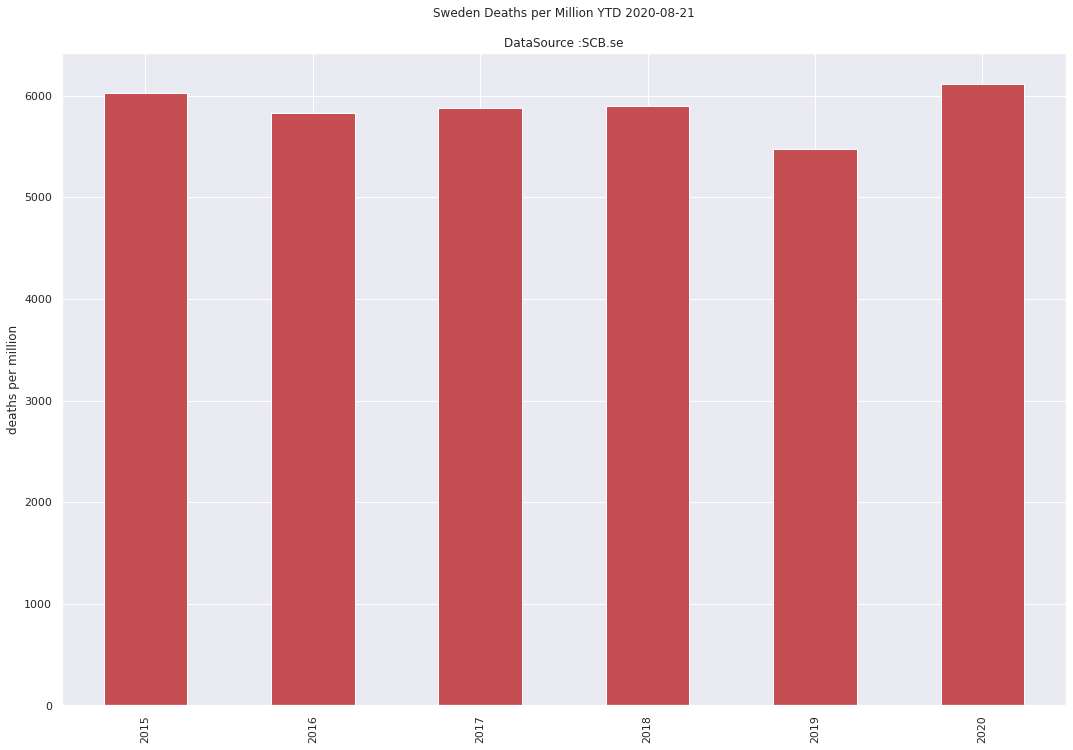

In [36]:
daily_deaths_per_M.sum().plot(kind='bar',
                              figsize=(18,12),
                              color='r',
                              title='Sweden Deaths per Million YTD {}\n\nDataSource :SCB.se'.format(last_stable_day))
plt.ylabel('deaths per million')
plt.savefig('fhm_scb_deaths_per_M.jpg',format='jpg')

In [37]:
daily_deaths_per_M_2015_2019_avg = daily_deaths_per_M[['2015','2016','2017','2018','2019']].mean(axis=1)
daily_deaths_per_M_2015_2019_avg

date
2020-01-01    29.438198
2020-01-02    29.337324
2020-01-03    29.368435
2020-01-04    28.098039
2020-01-05    28.304808
                ...    
2020-08-17    21.526200
2020-08-18    21.877219
2020-08-19    22.490618
2020-08-20    22.219792
2020-08-21    23.035729
Length: 234, dtype: float64

Text(0, 0.5, 'deaths per million per day')

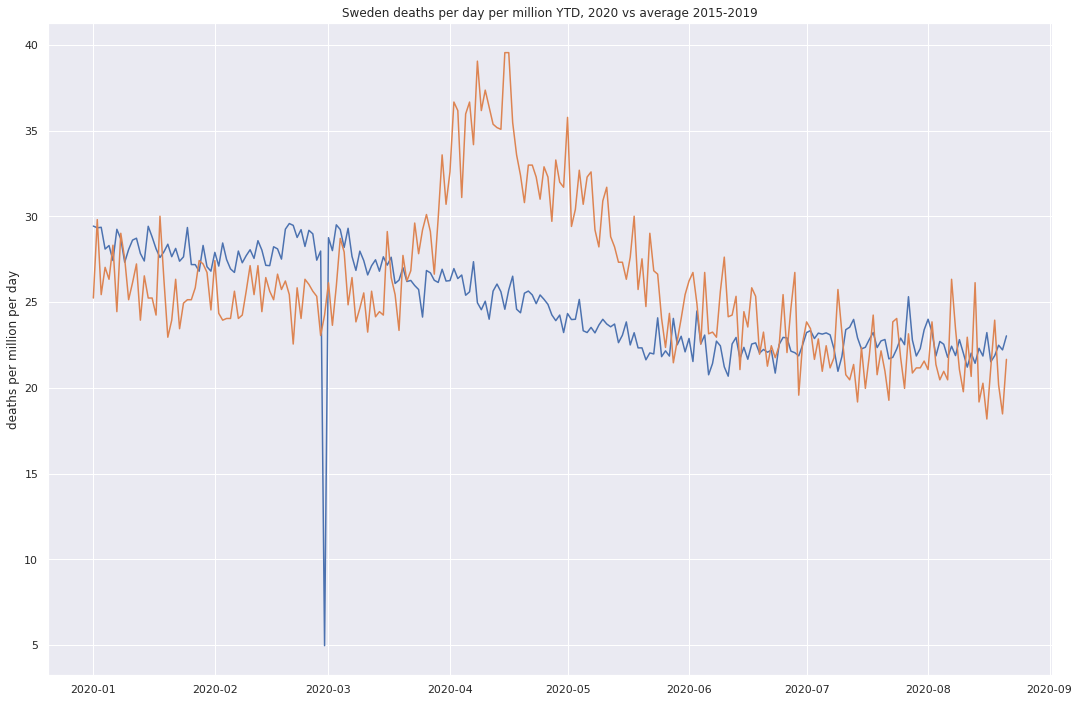

In [38]:
plt.figure(figsize=(18,12))
plt.plot(daily_deaths_per_M_2015_2019_avg)
plt.plot(daily_deaths_per_M['2020'])
plt.title('Sweden deaths per day per million YTD, 2020 vs average 2015-2019')
plt.ylabel('deaths per million per day')

In [39]:
import calendar
d = dict(enumerate(calendar.month_abbr))

In [40]:
monthly_deaths_per_M = daily_deaths_per_M.groupby(daily_deaths_per_M.index.month).sum()
month_names = pd.Series(monthly_deaths_per_M.index.values).map(d)
month_names
monthly_deaths_per_M.index = month_names
monthly_deaths_per_M.index.name = 'month'
monthly_deaths_per_M

,2015,2016,2017,2018,2019,2020
month,,,,,,
Jan,885.965056,874.099789,921.461471,861.545163,815.604149,806.982917
Feb,827.495670,784.521945,797.330962,818.658735,727.797488,731.949407
Mar,884.118654,818.982828,817.681886,925.021095,755.336850,831.331540
Apr,789.234125,757.321366,766.045214,764.824717,717.021216,1030.592716
May,749.946801,714.884374,742.353094,680.759282,695.668232,864.624554
Jun,694.144441,668.970615,673.807943,652.737470,643.782478,718.135291
Jul,721.737887,724.394350,686.261493,729.069287,670.822938,678.183673
Aug,473.499444,482.145590,472.121178,462.811857,452.304087,451.691793


In [41]:
monthly_deaths_per_M.sum()

2015    6026.142079
2016    5825.320857
2017    5877.063240
2018    5895.427606
2019    5478.337437
2020    6113.491891
dtype: float64

In [42]:
ytd_deaths_per_M_avg = monthly_deaths_per_M.loc[:,:'2019'].sum().mean()
ytd_deaths_per_M_avg

5820.458243976561

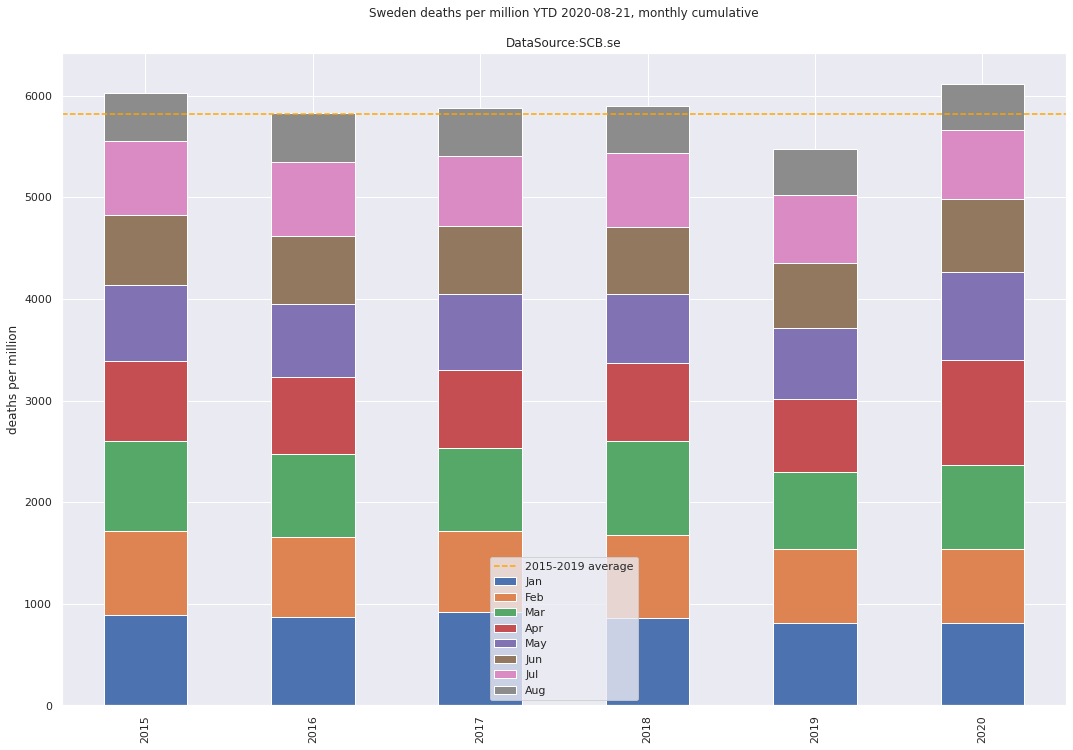

In [43]:
monthly_deaths_per_M.T.plot(kind='bar',
                            stacked=True,figsize=(18,12),
                           title='Sweden deaths per million YTD {}, monthly cumulative\n\nDataSource:SCB.se'.format(
                               last_stable_day))
plt.ylabel('deaths per million')
plt.axhline(ytd_deaths_per_M_avg,ls='dashed',color='orange',label='2015-2019 average')
plt.legend(loc='lower center')

plt.savefig('fhm_deaths_per_M_stacked_monthly_YTD.jpg',format='jpg')

In [44]:
# FHM excel sheed döda åldersgrupp
fhm_age_grp = pd.read_csv('fhm_dead_age_grp.csv',sep=';')
age_grp = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90+']
fhm_age_grp.drop('Åldersgrupp',axis=1,inplace=True)
fhm_cols = ['cases','icu','dead']
fhm_age_grp.columns = fhm_cols
fhm_age_grp['age_grp'] = age_grp
fhm_age_grp.set_index('age_grp',inplace=True,drop=True)
fhm_age_grp

,cases,icu,dead
age_grp,,,
0-9,597,8,1
10-19,3803,15,0
20-29,13394,95,10
30-39,12891,118,16
40-49,13732,287,45
50-59,14826,654,162
60-69,8481,769,401
70-79,5987,508,1255
80-89,6640,108,2412


In [45]:
print (fhm_age_grp.sum())
scb_deaths['2020'].sum()

cases    83940
icu       2566
dead      5821
dtype: int64


63137.63160848583

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


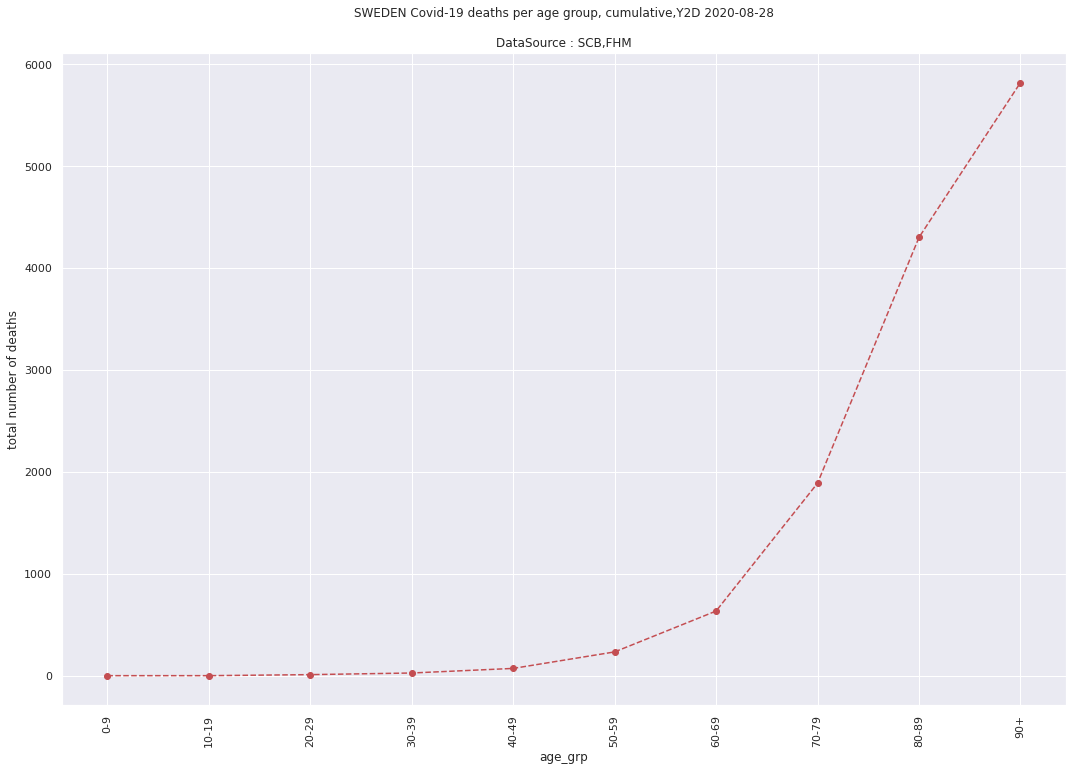

In [46]:
fhm_age_grp['dead'].cumsum().plot(style='ro--',
                                  title='SWEDEN Covid-19 deaths per age group, cumulative,Y2D {}\n\nDataSource : SCB,FHM'.format(last_day),
                                  figsize=(18,12))
plt.ylabel('total number of deaths')
_= plt.xticks(range(len(fhm_age_grp)),age_grp,rotation=90)
plt.savefig('fhm_scb_cumulative_covid_deaths.jpg',format='jpg')

In [47]:
# population stratified

url2 = 'http://api.scb.se/OV0104/v1/doris/sv/ssd/START/BE/BE0101/BE0101A/BefolkningR1860'

data2 = {
  "query": [
    {
      "code": "Alder",
      "selection": {
        "filter": "vs:Ålder1årA",
        "values": [
          "0",
          "1",
          "2",
          "3",
          "4",
          "5",
          "6",
          "7",
          "8",
          "9",
          "10",
          "11",
          "12",
          "13",
          "14",
          "15",
          "16",
          "17",
          "18",
          "19",
          "20",
          "21",
          "22",
          "23",
          "24",
          "25",
          "26",
          "27",
          "28",
          "29",
          "30",
          "31",
          "32",
          "33",
          "34",
          "35",
          "36",
          "37",
          "38",
          "39",
          "40",
          "41",
          "42",
          "43",
          "44",
          "45",
          "46",
          "47",
          "48",
          "49",
          "50",
          "51",
          "52",
          "53",
          "54",
          "55",
          "56",
          "57",
          "58",
          "59",
          "60",
          "61",
          "62",
          "63",
          "64",
          "65",
          "66",
          "67",
          "68",
          "69",
          "70",
          "71",
          "72",
          "73",
          "74",
          "75",
          "76",
          "77",
          "78",
          "79",
          "80",
          "81",
          "82",
          "83",
          "84",
          "85",
          "86",
          "87",
          "88",
          "89",
          "90",
          "91",
          "92",
          "93",
          "94",
          "95",
          "96",
          "97",
          "98",
          "99",
          "100+"
        ]
      }
    },
    {
      "code": "Kon",
      "selection": {
        "filter": "item",
        "values": [
          "1",
          "2"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2019"
        ]
      }
    }
  ],
  "response": {
    "format": "json"
  }
}

In [48]:
r2 = requests.post(url2,json=data2)
r2.status_code

200

In [49]:
json2 = r2.json()
json2['data'][0]

{'key': ['0', '1', '2019'], 'values': ['59476']}

In [50]:
data2_list = []

for rec2 in range(len(json2['data'])):
    
    data2_list.append((json2['data'][rec2]['key'][0],json2['data'][rec2]['key'][1],json2['data'][rec2]['key'][2],
                      json2['data'][rec2]['values'][0]))

In [51]:
population_age_grp = pd.DataFrame(data=data2_list,columns=['age_grp','gender','year','pop'])
population_age_grp['pop'] = population_age_grp['pop'].astype(int)
population_age_grp['age_grp'] = population_age_grp['age_grp'].apply(lambda s : s.replace('+',''))
population_age_grp['age_grp'] = population_age_grp['age_grp'].astype(int)
population_age_grp

,age_grp,gender,year,pop
0,0,1,2019,59476
1,0,2,2019,55907
2,1,1,2019,60993
3,1,2,2019,57783
4,2,1,2019,61598
...,...,...,...,...
197,98,2,2019,2126
198,99,1,2019,377
199,99,2,2019,1477
200,100,1,2019,375


In [52]:
population_age_grp = pd.pivot_table(population_age_grp,index='age_grp',columns='gender',values='pop')
population_age_grp

gender,1,2
age_grp,,
0,59476,55907
1,60993,57783
2,61598,58432
3,63965,60716
4,63535,59313
...,...,...
96,1372,3869
97,917,2738
98,583,2126


In [53]:
population_age_grp['pop'] = population_age_grp.sum(axis=1)
population_age_grp.drop(['1','2'],axis=1,inplace=True)


In [54]:
population_age_grp = pd.Series(population_age_grp['pop'])
population_age_grp

age_grp
0      115383
1      118776
2      120030
3      124681
4      122848
        ...  
96       5241
97       3655
98       2709
99       1854
100      2207
Name: pop, Length: 101, dtype: int64

In [55]:
population_age_grp.loc['30':'39'].sum()

1366489

In [56]:
population_age_grp

age_grp
0      115383
1      118776
2      120030
3      124681
4      122848
        ...  
96       5241
97       3655
98       2709
99       1854
100      2207
Name: pop, Length: 101, dtype: int64

In [57]:
zero_9 = pd.Series(population_age_grp.loc[0:9].sum())
ten_19 = pd.Series(population_age_grp.loc[10:19].sum())
twenty_29 = pd.Series(population_age_grp.loc[20:29].sum())
thirty_39 = pd.Series(population_age_grp.loc[30:39].sum())
forty_49 = pd.Series(population_age_grp.loc[40:49].sum())
fifty_59 = pd.Series(population_age_grp.loc[50:59].sum())
sixty_69 = pd.Series(population_age_grp.loc[60:69].sum())
seventy_79 = pd.Series(population_age_grp.loc[70:79].sum())
eighty_89 = pd.Series(population_age_grp.loc[80:89].sum())
ninety_plus = pd.Series(population_age_grp.loc[90:].sum())

thirty_39

0    1366489
dtype: int64

In [58]:
population_age_grp = pd.DataFrame([zero_9,ten_19,twenty_29,thirty_39,forty_49,fifty_59,
                               sixty_69,seventy_79,eighty_89,ninety_plus],index=age_grp)

population_age_grp.rename(columns={0:'pop'},inplace=True)

population_age_grp

,pop
0-9,1225802
10-19,1177928
20-29,1327395
30-39,1366489
40-49,1298355
50-59,1297863
60-69,1108438
70-79,989013
80-89,436679
90+,99627


In [59]:
population_age_grp['pop'].sum()

10327589

In [60]:
population_age_grp

,pop
0-9,1225802
10-19,1177928
20-29,1327395
30-39,1366489
40-49,1298355
50-59,1297863
60-69,1108438
70-79,989013
80-89,436679
90+,99627


In [61]:
fhm_age_grp

,cases,icu,dead
age_grp,,,
0-9,597,8,1
10-19,3803,15,0
20-29,13394,95,10
30-39,12891,118,16
40-49,13732,287,45
50-59,14826,654,162
60-69,8481,769,401
70-79,5987,508,1255
80-89,6640,108,2412


In [62]:
covid_dead_per_age_grp = fhm_age_grp['dead'] / population_age_grp['pop']
covid_dead_per_age_grp

age_grp
0-9      8.157924e-07
10-19    0.000000e+00
20-29    7.533553e-06
30-39    1.170884e-05
40-49    3.465924e-05
50-59    1.248206e-04
60-69    3.617703e-04
70-79    1.268942e-03
80-89    5.523508e-03
90+      1.524687e-02
dtype: float64

Text(0, 0.5, 'percent of age group')

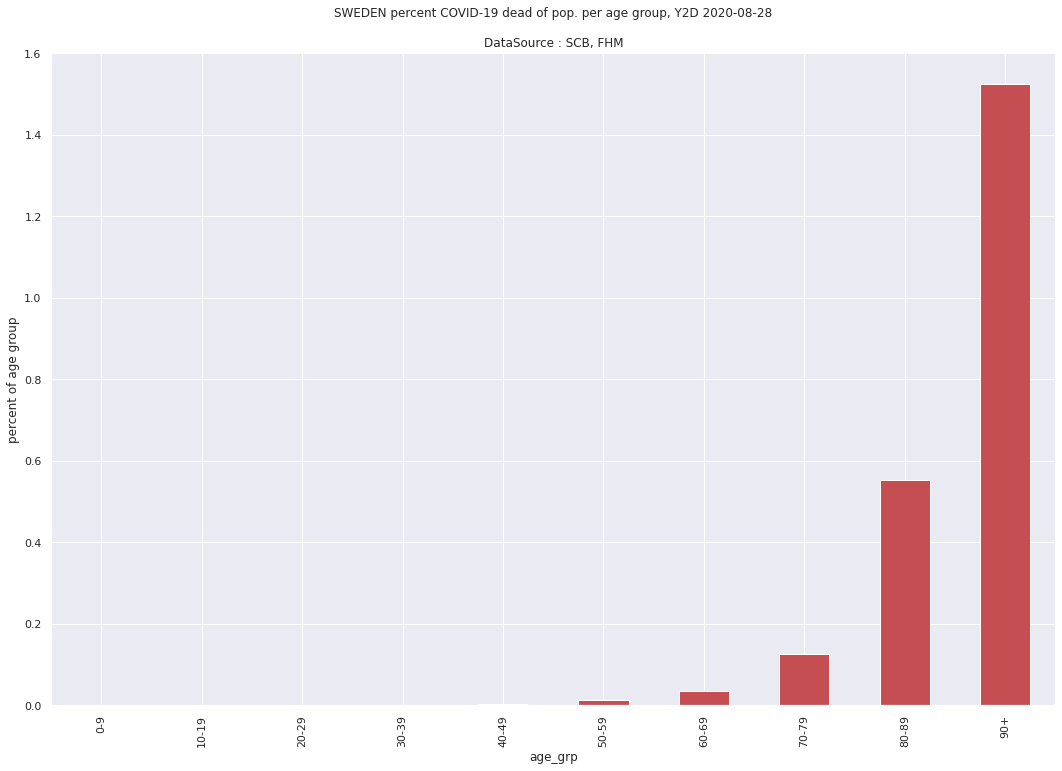

In [63]:
(100 * covid_dead_per_age_grp).plot(kind='bar',color='r',figsize=(18,12),
                                    title='SWEDEN percent COVID-19 dead of pop. per age group, Y2D {}\n\nDataSource : SCB, FHM'.format(last_day))
plt.ylabel('percent of age group')
#plt.yscale('log')

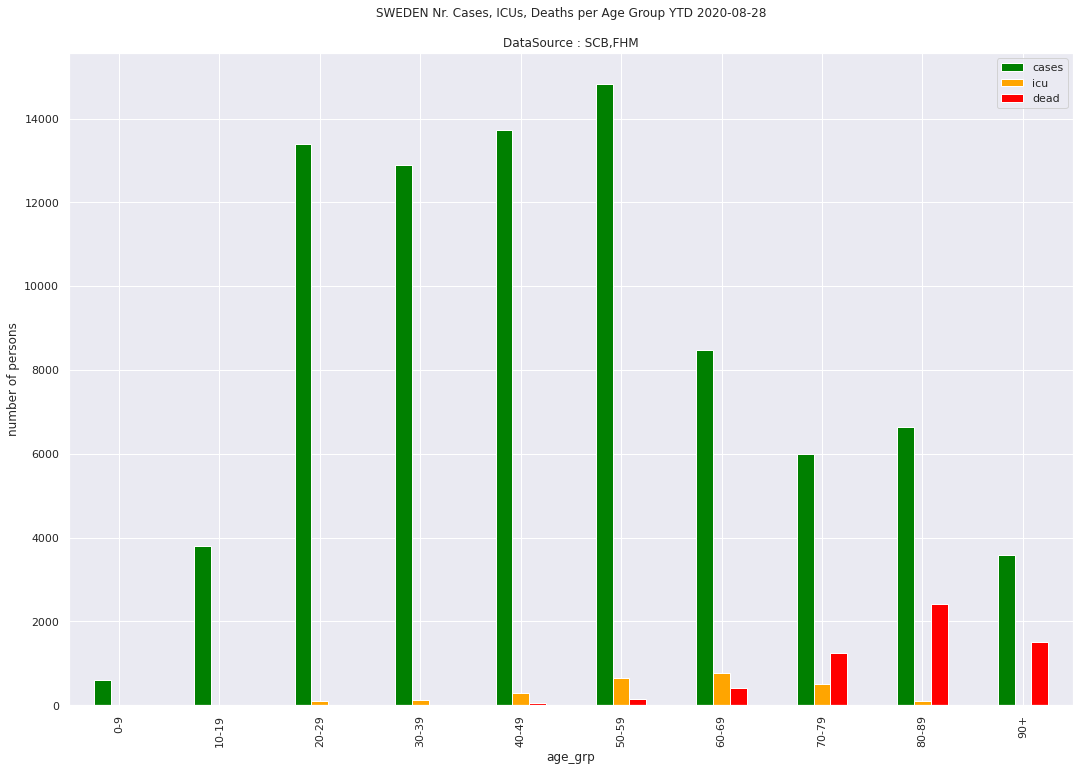

In [64]:
fhm_age_grp.plot(kind='bar',
                 figsize=(18,12),
                 color=['green','orange','red'],
                title='SWEDEN Nr. Cases, ICUs, Deaths per Age Group YTD {}\n\nDataSource : SCB,FHM'.format(last_day))
plt.ylabel('number of persons')
plt.savefig('fhm_case_icu_deaths.jpg',format='jpg')

In [65]:
fhm_data_per_age_group_capita = fhm_age_grp.div(population_age_grp['pop'],axis=0)
fhm_data_per_age_group_capita

,cases,icu,dead
age_grp,,,
0-9,0.000487,0.000007,8.157924e-07
10-19,0.003229,0.000013,0.000000e+00
20-29,0.010090,0.000072,7.533553e-06
30-39,0.009434,0.000086,1.170884e-05
40-49,0.010576,0.000221,3.465924e-05
50-59,0.011423,0.000504,1.248206e-04
60-69,0.007651,0.000694,3.617703e-04
70-79,0.006054,0.000514,1.268942e-03
80-89,0.015206,0.000247,5.523508e-03


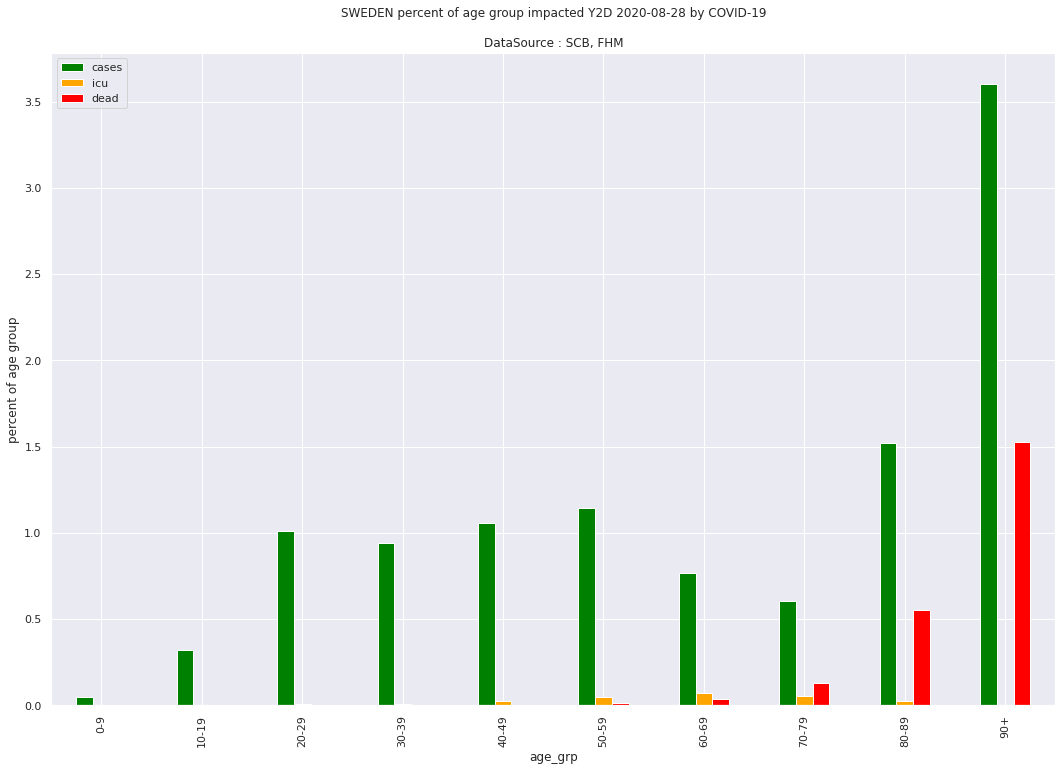

In [66]:
(100 * fhm_data_per_age_group_capita).plot(kind='bar',title='SWEDEN percent of age group impacted Y2D {} by COVID-19\n\nDataSource : SCB, FHM'.format(last_day),
                                           figsize=(18,12),color=['green','orange','red'])
plt.ylabel('percent of age group')
plt.savefig('fhm_pct_age_grp_impacted.jpg',format='jpg')

In [67]:
scb_deaths = scb_deaths_orig # include all dates
scb_deaths


,2015,2016,2017,2018,2019,2020,2015-2019,excess,cumexcess,excess_19,cumexcess_19
date,,,,,,,,,,,
2020-01-01,298.096,250.41,347.359,282.558,309.147,260.7,297.655,-36.9553,-36.9553,11.4917,11.4917
2020-01-02,274.855,278.006,324.817,320.575,284.415,307.913,296.632,11.2809,-25.6744,-12.2172,-0.725529
2020-01-03,283.949,299.47,317.644,303.108,279.263,262.753,296.632,-33.8797,-59.5541,-17.3697,-18.0952
2020-01-04,258.687,265.741,312.521,292.833,290.598,279.175,284.358,-5.18321,-64.7373,6.24018,-11.855
2020-01-05,270.813,265.741,311.496,298.998,283.385,271.99,286.404,-14.4136,-79.1509,-3.01899,-14.874
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-24,215.236,232.013,231.573,218.854,233.921,168.326,226.054,-57.7284,4057.59,7.86685,-2382.23
2020-08-25,220.288,243.256,230.548,216.799,231.86,157.036,228.1,-71.0643,3986.52,3.76012,-2378.47
2020-08-26,219.278,239.167,208.006,218.854,229.799,96.4795,222.986,-126.506,3860.02,6.8135,-2371.66


In [68]:
fhm_dead = pd.read_csv('fhm_scb_dead.csv',sep=';',header=0,index_col=0,parse_dates=True,names=['fhm_dead'])
fhm_dead

,fhm_dead
2020-03-11,1
2020-03-12,0
2020-03-13,1
2020-03-14,1
2020-03-15,2
...,...
2020-08-23,0
2020-08-24,0
2020-08-25,0
2020-08-26,0


In [69]:
cmp_deaths = fhm_dead.join(scb_deaths['2020'])


In [70]:
cmp_deaths.dropna(inplace=True)

In [71]:
cmp_deaths['pct_covid'] = cmp_deaths['fhm_dead'] / cmp_deaths['2020']
cmp_deaths['non_covid'] = cmp_deaths['2020'] - cmp_deaths['fhm_dead']
cmp_deaths.columns=['covid_dead','all_dead','pct_covid','non_covid_dead']
cmp_deaths['pct_non_covid'] = cmp_deaths['non_covid_dead'] / cmp_deaths['all_dead']
cmp_deaths

,covid_dead,all_dead,pct_covid,non_covid_dead,pct_non_covid
2020-03-11,1,240.172,0.00416368,239.172,0.995836
2020-03-12,0,264.805,0,264.805,1
2020-03-13,1,249.41,0.00400947,248.41,0.995991
2020-03-14,1,252.489,0.00396057,251.489,0.996039
2020-03-15,2,250.436,0.00798607,248.436,0.992014
...,...,...,...,...,...
2020-08-23,0,182.695,0,182.695,1
2020-08-24,0,168.326,0,168.326,1
2020-08-25,0,157.036,0,157.036,1
2020-08-26,0,96.4795,0,96.4795,1


In [72]:
cmp_deaths = cmp_deaths.astype(float)

In [73]:
covid_death_pct_in_period = cmp_deaths.sum()['covid_dead'] / cmp_deaths.sum()['all_dead']
covid_death_pct_in_period

0.1279646201354138

In [74]:
covid_death_pct_YTD = cmp_deaths.sum()['covid_dead'] / scb_deaths['2020'].sum()
covid_death_pct_YTD

0.09086364204474437

In [75]:
days_of_year = pd.to_datetime(last_stable_day).dayofyear
year_fraction = days_of_year / 365

pred_covid_deaths = cmp_deaths.sum()['covid_dead'] * (1 / year_fraction) #worst case! 

pred_death_pct = cmp_deaths.sum()['covid_dead'] / (scb_deaths['2020'].sum() * (1/year_fraction))
pred_death_pct
pred_covid_deaths

9071.965811965812

<BarContainer object of 170 artists>

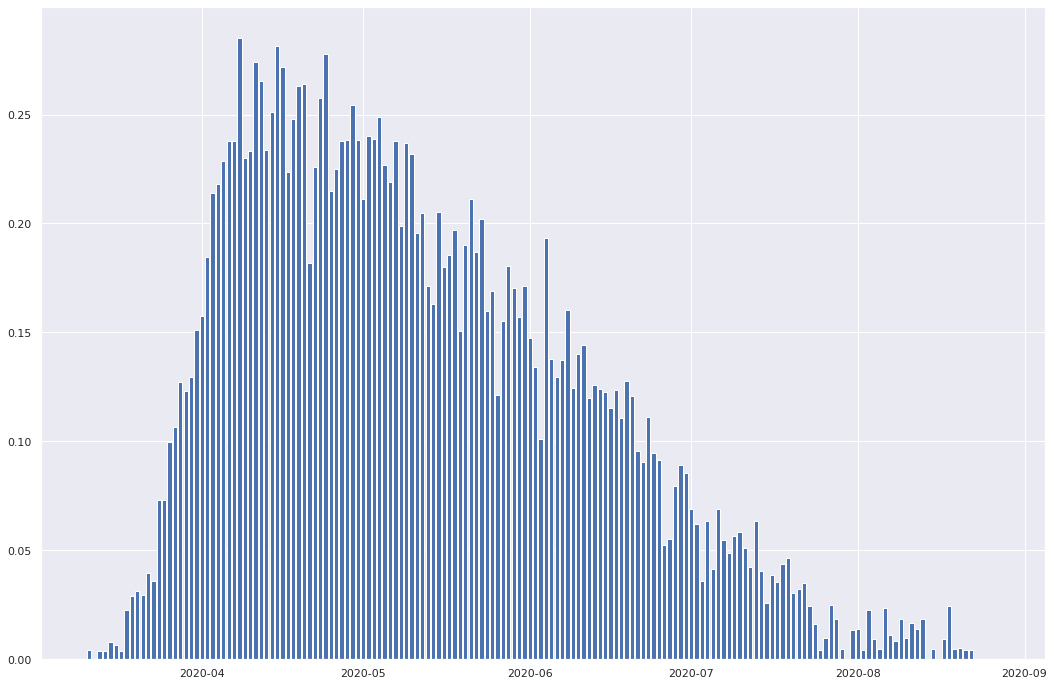

In [76]:
plt.figure(figsize=(18,12))
plt.bar(cmp_deaths.index.date,cmp_deaths['pct_covid'])


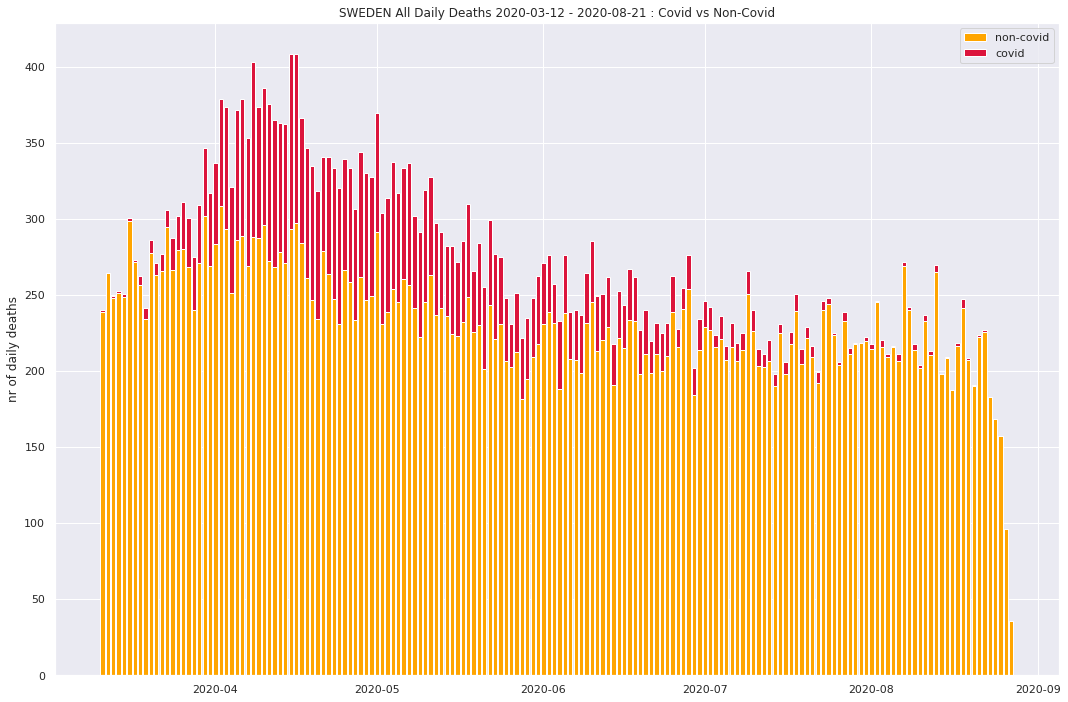

In [104]:

plt.figure(figsize=(18,12))
plt.bar(cmp_deaths.index.date,cmp_deaths['non_covid_dead'],color='orange',label='non-covid')
plt.bar(cmp_deaths.index.date,cmp_deaths['covid_dead'],bottom=cmp_deaths['non_covid_dead'],
        color='crimson',label='covid')

plt.legend(loc='upper right')
plt.title('SWEDEN All Daily Deaths 2020-03-12 - {} : Covid vs Non-Covid'.format(last_stable_day))
plt.ylabel('nr of daily deaths')
plt.savefig('fhm_covid_vs_non_covid_deaths_abs.jpg',format='jpg')

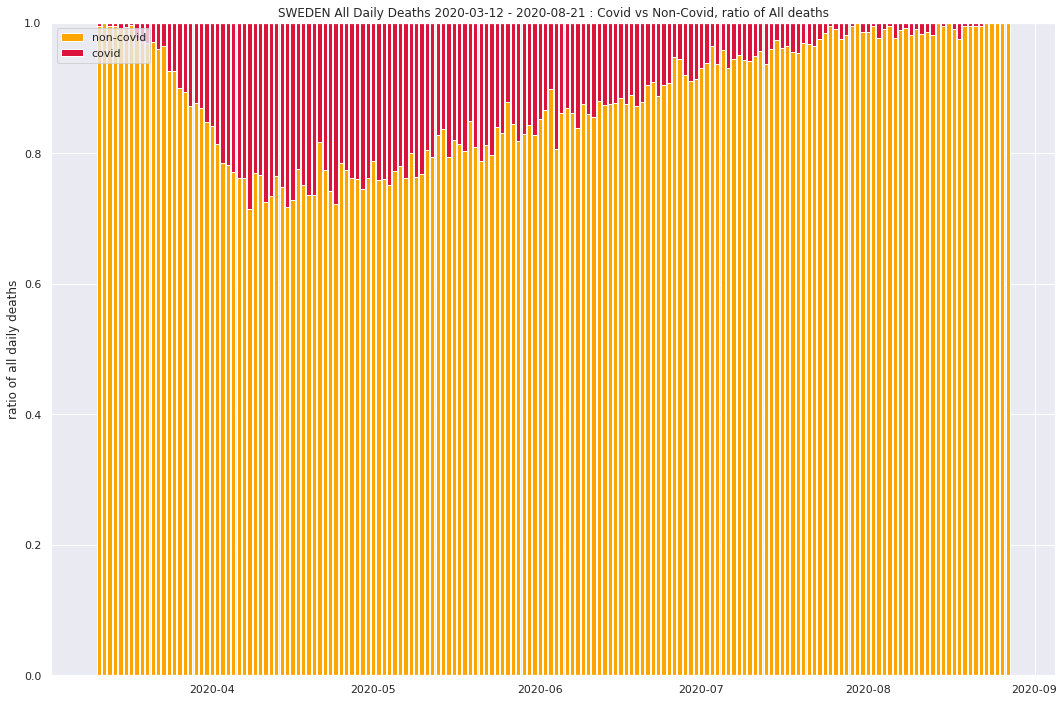

In [105]:
plt.figure(figsize=(18,12))
plt.bar(cmp_deaths.index.date,cmp_deaths['pct_non_covid'],color='orange',label='non-covid')
plt.bar(cmp_deaths.index.date,cmp_deaths['pct_covid'],bottom=cmp_deaths['pct_non_covid'],
        color='crimson',label='covid')

plt.legend(loc='upper left')
plt.title('SWEDEN All Daily Deaths 2020-03-12 - {} : Covid vs Non-Covid, ratio of All deaths'.format(last_stable_day))
plt.ylabel('ratio of all daily deaths')
plt.savefig('fhm_covid_vs_non_covid_deaths_rel.jpg',format='jpg')

In [79]:
first_day = pd.to_datetime("2020-03-12")
first_day.day_name()

'Thursday'

In [80]:
weekly_scb = scb_deaths.loc[:,'2015' : '2020'].resample('W-TUE').sum()
weekly_scb

,2015,2016,2017,2018,2019,2020
date,,,,,,
2020-01-07,1957.331397,1886.764278,2246.050486,2052.915048,2024.912653,1927.537546
2020-01-14,1974.509834,1946.045062,2161.003866,1994.348403,1856.942799,1916.247390
2020-01-21,1957.331397,2012.480424,2139.486047,1998.458343,1887.857496,1838.242676
2020-01-28,1949.247426,2020.657084,1969.392808,1980.991098,1862.095249,1841.321809
2020-02-04,1986.635790,1973.641289,1960.170885,1904.957207,1928.046602,1841.321809
2020-02-11,1938.131966,1955.243804,1878.198240,2037.502773,1903.314845,1819.767875
2020-02-18,2071.517482,1822.373081,2053.414769,2079.629658,1807.479284,1871.086766
2020-02-25,2171.556619,1915.382587,2122.066860,2174.158279,1906.406315,1822.847009
2020-03-03,1761.295108,1845.880978,1794.176278,1928.589362,1539.551910,1797.187563


In [81]:
weekly_fhm = fhm_dead.resample('W-TUE').sum()
weekly_fhm

,fhm_dead
2020-03-17,8
2020-03-24,73
2020-03-31,251
2020-04-07,532
2020-04-14,667
2020-04-21,628
2020-04-28,555
2020-05-05,544
2020-05-12,481
2020-05-19,357


In [82]:
weekly_deaths = weekly_scb.join(weekly_fhm,how='outer')
weekly_deaths.rename(columns={'fhm_dead' : 'covid_dead'},inplace=True)
weekly_deaths['covid_dead'].fillna(0,inplace=True)
weekly_deaths

,2015,2016,2017,2018,2019,2020,covid_dead
2020-01-07,1957.331397,1886.764278,2246.050486,2052.915048,2024.912653,1927.537546,0.0
2020-01-14,1974.509834,1946.045062,2161.003866,1994.348403,1856.942799,1916.247390,0.0
2020-01-21,1957.331397,2012.480424,2139.486047,1998.458343,1887.857496,1838.242676,0.0
2020-01-28,1949.247426,2020.657084,1969.392808,1980.991098,1862.095249,1841.321809,0.0
2020-02-04,1986.635790,1973.641289,1960.170885,1904.957207,1928.046602,1841.321809,0.0
2020-02-11,1938.131966,1955.243804,1878.198240,2037.502773,1903.314845,1819.767875,0.0
2020-02-18,2071.517482,1822.373081,2053.414769,2079.629658,1807.479284,1871.086766,0.0
2020-02-25,2171.556619,1915.382587,2122.066860,2174.158279,1906.406315,1822.847009,0.0
2020-03-03,1761.295108,1845.880978,1794.176278,1928.589362,1539.551910,1797.187563,0.0
2020-03-10,2049.286563,1938.890485,1919.184562,2282.044205,1741.527931,1879.297789,0.0


In [83]:
weekly_deaths['2015-2018'] = weekly_deaths.loc[:,'2015' : '2018'].mean(axis=1)
weekly_deaths['non_covid_dead'] = weekly_deaths['2020'] - weekly_deaths['covid_dead']
weekly_deaths.index = weekly_deaths.index.date
weekly_deaths['max'] = weekly_deaths.loc[:,'2015' :'2018'].max(axis=1)
weekly_deaths['min'] = weekly_deaths.loc[:,'2015' :'2018'].min(axis=1)
weekly_deaths = weekly_deaths[:-1]
weekly_deaths

,2015,2016,2017,2018,2019,2020,covid_dead,2015-2018,non_covid_dead,max,min
2020-01-07,1957.331397,1886.764278,2246.050486,2052.915048,2024.912653,1927.537546,0.0,2035.765302,1927.537546,2246.050486,1886.764278
2020-01-14,1974.509834,1946.045062,2161.003866,1994.348403,1856.942799,1916.247390,0.0,2018.976791,1916.247390,2161.003866,1946.045062
2020-01-21,1957.331397,2012.480424,2139.486047,1998.458343,1887.857496,1838.242676,0.0,2026.939053,1838.242676,2139.486047,1957.331397
2020-01-28,1949.247426,2020.657084,1969.392808,1980.991098,1862.095249,1841.321809,0.0,1980.072104,1841.321809,2020.657084,1949.247426
2020-02-04,1986.635790,1973.641289,1960.170885,1904.957207,1928.046602,1841.321809,0.0,1956.351293,1841.321809,1986.635790,1904.957207
2020-02-11,1938.131966,1955.243804,1878.198240,2037.502773,1903.314845,1819.767875,0.0,1952.269196,1819.767875,2037.502773,1878.198240
2020-02-18,2071.517482,1822.373081,2053.414769,2079.629658,1807.479284,1871.086766,0.0,2006.733748,1871.086766,2079.629658,1822.373081
2020-02-25,2171.556619,1915.382587,2122.066860,2174.158279,1906.406315,1822.847009,0.0,2095.791086,1822.847009,2174.158279,1915.382587
2020-03-03,1761.295108,1845.880978,1794.176278,1928.589362,1539.551910,1797.187563,0.0,1832.485432,1797.187563,1928.589362,1761.295108
2020-03-10,2049.286563,1938.890485,1919.184562,2282.044205,1741.527931,1879.297789,0.0,2047.351454,1879.297789,2282.044205,1919.184562


Text(0, 0.5, 'number of deaths per week')

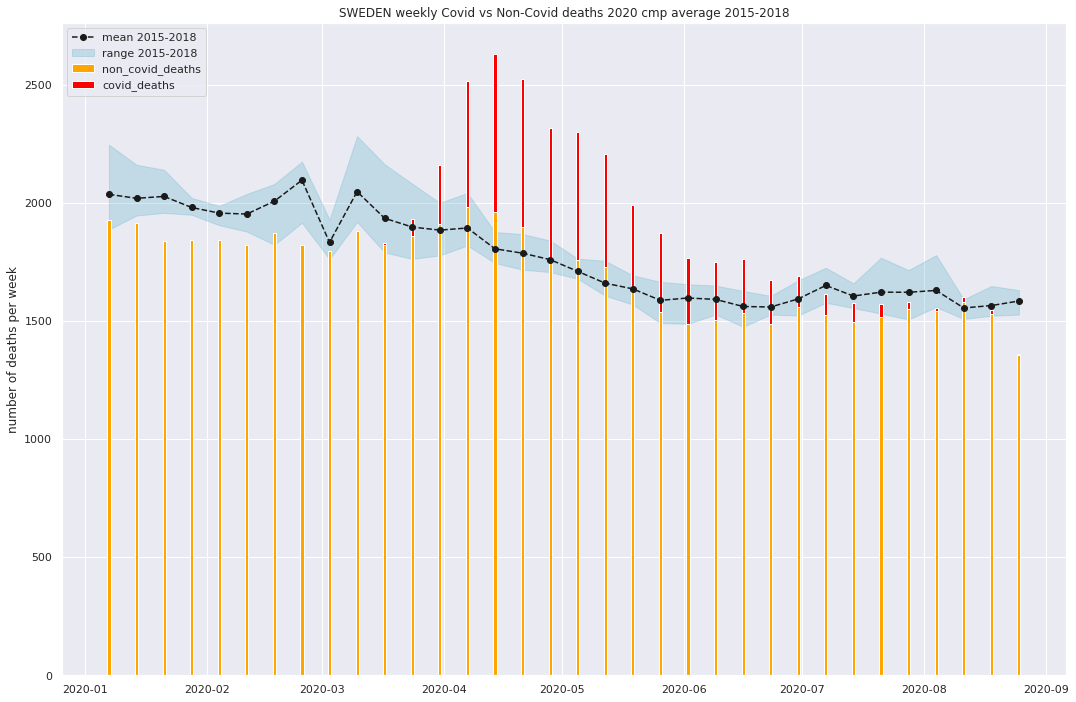

In [84]:
plt.figure(figsize=(18,12))
plt.title('SWEDEN weekly Covid vs Non-Covid deaths 2020 cmp average 2015-2018')
plt.bar(weekly_deaths.index,weekly_deaths['non_covid_dead'],label='non_covid_deaths',color='orange')
plt.bar(weekly_deaths.index,weekly_deaths['covid_dead'],bottom=weekly_deaths['non_covid_dead'],
       label='covid_deaths',color='red')
plt.plot(weekly_deaths.index,weekly_deaths['2015-2018'],'o--',color='k',label='mean 2015-2018')

plt.fill_between(weekly_deaths.index,weekly_deaths['min'],weekly_deaths['max'],color='c',alpha=0.3,
                label='range 2015-2018')

plt.legend(loc='upper left')
plt.ylabel('number of deaths per week')

In [85]:
population

,population,growth
year,,
2014,9747355,NaN
2015,9851017,1.010635
2016,9995153,1.014632
2017,10120242,1.012515
2018,10230185,1.010864
2019,10327589,1.009521
2020,10327589,NaN


In [86]:
# pop from end of previous year
pop = population.shift()
pop = pop['population']
pop['covid_dead'] = pop['2020']
pop.dropna(inplace=True)
pop

year
2015           9747355.0
2016           9851017.0
2017           9995153.0
2018          10120242.0
2019          10230185.0
2020          10327589.0
covid_dead    10327589.0
Name: population, dtype: float64

In [87]:
weekly_pop_adjusted_deaths = weekly_deaths.loc[:,'2015' : 'covid_dead'].copy()
weekly_pop_adjusted_deaths = weekly_pop_adjusted_deaths / (pop / 1e6)
weekly_pop_adjusted_deaths['2015-2018'] = weekly_pop_adjusted_deaths.loc[:,'2015' : '2018'].mean(axis=1)
weekly_pop_adjusted_deaths['min'] = weekly_pop_adjusted_deaths.loc[:,'2015' : '2018'].min(axis=1)
weekly_pop_adjusted_deaths['max'] = weekly_pop_adjusted_deaths.loc[:,'2015' : '2018'].max(axis=1)

weekly_pop_adjusted_deaths['non_covid_dead'] = weekly_pop_adjusted_deaths['2020'] - weekly_pop_adjusted_deaths['covid_dead']
weekly_pop_adjusted_deaths['week_idx'] = range(len(weekly_pop_adjusted_deaths))
weekly_pop_adjusted_deaths

,2015,2016,2017,2018,2019,2020,covid_dead,2015-2018,min,max,non_covid_dead,week_idx
2020-01-07,200.806413,191.529898,224.713967,202.852367,197.935096,186.639645,0.000000,204.975661,191.529898,224.713967,186.639645,0
2020-01-14,202.568782,197.547630,216.205181,197.065288,181.516053,185.546442,0.000000,203.346720,197.065288,216.205181,185.546442,1
2020-01-21,200.806413,204.291641,214.052356,197.471399,184.537963,177.993400,0.000000,204.155452,197.471399,214.052356,177.993400,2
2020-01-28,199.977063,205.121673,197.034784,195.745428,182.019704,178.291546,0.000000,199.469737,195.745428,205.121673,178.291546,3
2020-02-04,203.812808,200.348988,196.112144,188.232377,188.466445,178.291546,0.000000,197.126579,188.232377,203.812808,178.291546,4
2020-02-11,198.836707,198.481416,187.910904,201.329452,186.048917,176.204521,0.000000,196.639620,187.910904,201.329452,176.204521,5
2020-02-18,212.520985,184.993395,205.441054,205.492088,176.680997,181.173628,0.000000,202.111880,184.993395,212.520985,181.173628,6
2020-02-25,222.784193,194.435010,212.309592,214.832637,186.351108,176.502668,0.000000,211.090358,194.435010,222.784193,176.502668,7
2020-03-03,180.694671,187.379737,179.504634,190.567514,150.491111,174.018114,0.000000,184.536639,179.504634,190.567514,174.018114,8
2020-03-10,210.240272,196.821352,192.011524,225.493047,170.234256,181.968685,0.000000,206.141549,192.011524,225.493047,181.968685,9


In [88]:
excess = weekly_pop_adjusted_deaths['2020'] - weekly_pop_adjusted_deaths['2015-2018']
excess

2020-01-07   -18.336016
2020-01-14   -17.800279
2020-01-21   -26.162052
2020-01-28   -21.178191
2020-02-04   -18.835033
2020-02-11   -20.435098
2020-02-18   -20.938253
2020-02-25   -34.587691
2020-03-03   -10.518525
2020-03-10   -24.172864
2020-03-17   -17.432732
2020-03-24    -4.012854
2020-03-31    19.472027
2020-04-07    52.767582
2020-04-14    72.762598
2020-04-21    64.314982
2020-04-28    47.253124
2020-05-05    50.503511
2020-05-12    46.583231
2020-05-19    27.778617
2020-05-26    21.230778
2020-06-02    10.076910
2020-06-09     8.958292
2020-06-16    13.113331
2020-06-23     4.815530
2020-06-30     3.140295
2020-07-07    -9.839231
2020-07-14    -9.165616
2020-07-21   -10.915890
2020-07-28   -10.359702
2020-08-04   -13.356842
2020-08-11    -1.624698
2020-08-18    -8.097057
2020-08-25   -28.138554
dtype: float64

In [89]:
cum_excess = excess.cumsum()
cum_excess

2020-01-07    -18.336016
2020-01-14    -36.136295
2020-01-21    -62.298347
2020-01-28    -83.476538
2020-02-04   -102.311571
2020-02-11   -122.746670
2020-02-18   -143.684922
2020-02-25   -178.272613
2020-03-03   -188.791138
2020-03-10   -212.964002
2020-03-17   -230.396733
2020-03-24   -234.409588
2020-03-31   -214.937560
2020-04-07   -162.169978
2020-04-14    -89.407380
2020-04-21    -25.092398
2020-04-28     22.160726
2020-05-05     72.664237
2020-05-12    119.247468
2020-05-19    147.026085
2020-05-26    168.256863
2020-06-02    178.333773
2020-06-09    187.292065
2020-06-16    200.405396
2020-06-23    205.220926
2020-06-30    208.361220
2020-07-07    198.521989
2020-07-14    189.356373
2020-07-21    178.440484
2020-07-28    168.080782
2020-08-04    154.723940
2020-08-11    153.099243
2020-08-18    145.002186
2020-08-25    116.863631
dtype: float64

In [90]:
cum_excess * (pop['2020'] / 1e6)

2020-01-07    -189.366840
2020-01-14    -373.200803
2020-01-21    -643.391728
2020-01-28    -862.111377
2020-02-04   -1056.631859
2020-02-11   -1267.677158
2020-02-18   -1483.918825
2020-02-25   -1841.126278
2020-03-03   -1949.757279
2020-03-10   -2199.404681
2020-03-17   -2379.442769
2020-03-24   -2420.885879
2020-03-31   -2219.786783
2020-04-07   -1674.824884
2020-04-14    -923.362679
2020-04-21    -259.143975
2020-04-28     228.866872
2020-05-05     750.446373
2020-05-12    1231.538836
2020-05-19    1518.424979
2020-05-26    1737.687726
2020-06-02    1841.757910
2020-06-09    1934.275467
2020-06-16    2069.704562
2020-06-23    2119.437373
2020-06-30    2151.869047
2020-07-07    2050.253510
2020-07-14    1955.594796
2020-07-21    1842.859975
2020-07-28    1735.869235
2020-08-04    1597.925265
2020-08-11    1581.146054
2020-08-18    1497.522979
2020-08-25    1206.919555
dtype: float64

In [91]:
last_week = cum_excess.index[-1]

Text(0, 0.5, 'cumulative excess deaths per million')

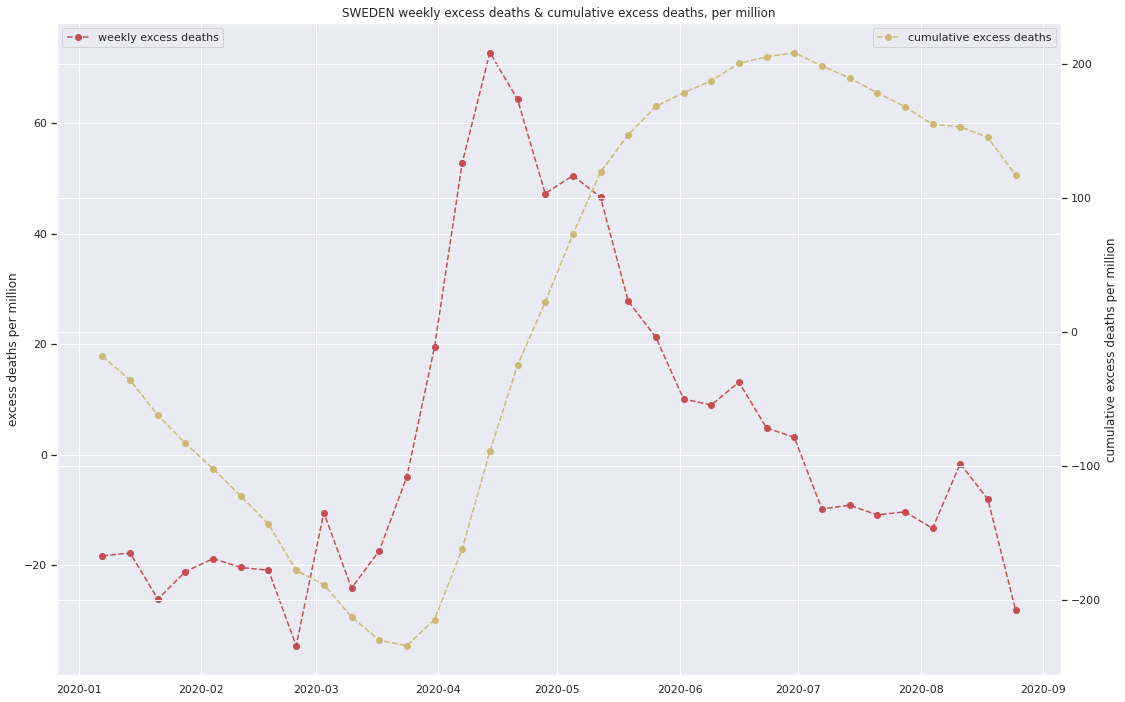

In [92]:

ax = excess.plot(figsize=(18,12),style='ro--',label='weekly excess deaths',
                title='SWEDEN weekly excess deaths & cumulative excess deaths, per million')
ax2 = plt.twinx()

cum_excess.plot(ax=ax2,style='yo--',label='cumulative excess deaths')

ax.legend(loc='upper left')
ax2.legend(loc='upper right')

ax.set_ylabel('excess deaths per million')
ax2.set_ylabel('cumulative excess deaths per million')

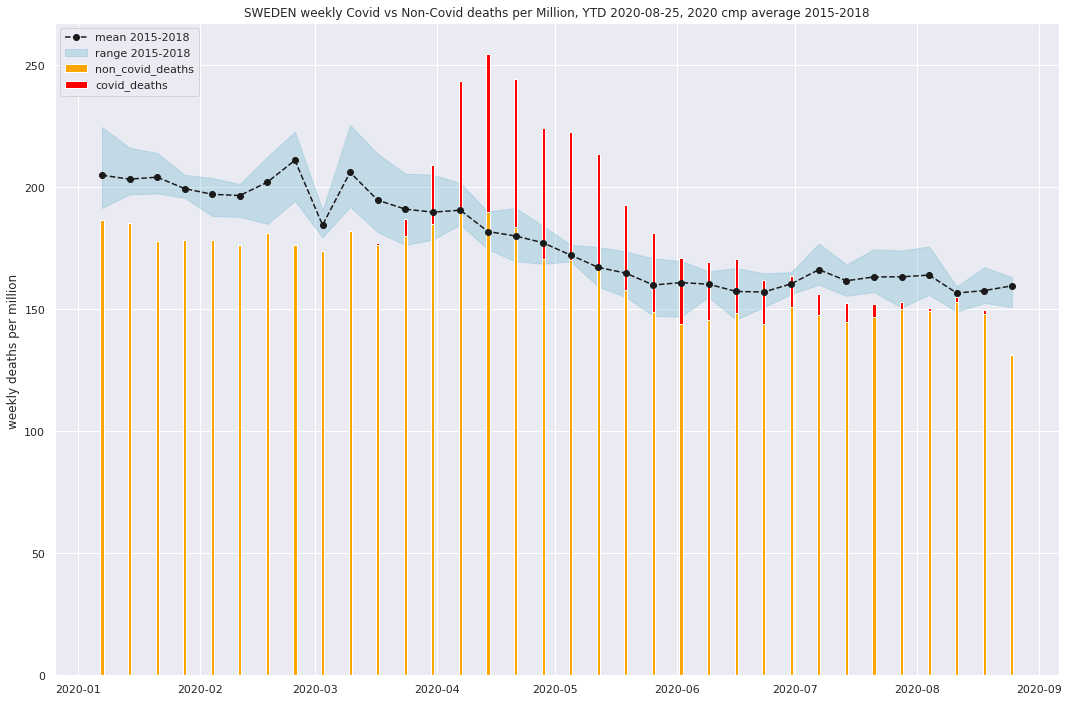

In [93]:
plt.figure(figsize=(18,12))
plt.title('SWEDEN weekly Covid vs Non-Covid deaths per Million, YTD {}, 2020 cmp average 2015-2018'.format(last_week))
plt.bar(weekly_pop_adjusted_deaths.index,weekly_pop_adjusted_deaths['non_covid_dead'],label='non_covid_deaths',color='orange')
plt.bar(weekly_pop_adjusted_deaths.index,weekly_pop_adjusted_deaths['covid_dead'],bottom=weekly_pop_adjusted_deaths['non_covid_dead'],
       label='covid_deaths',color='red')
plt.plot(weekly_pop_adjusted_deaths.index,weekly_pop_adjusted_deaths['2015-2018'],'o--',color='k',label='mean 2015-2018')

plt.fill_between(weekly_pop_adjusted_deaths.index,weekly_pop_adjusted_deaths['min'],weekly_pop_adjusted_deaths['max'],color='c',alpha=0.3,
                label='range 2015-2018')

plt.legend(loc='upper left')
plt.ylabel('weekly deaths per million ')

plt.savefig('fhm_weekly_covid_non_covid_per_m.jpg',format='jpg')

In [94]:
weekly_pop_adjusted_deaths.sum() * (pop / 1e6) 

2015              60238.717888
2015-2018                  NaN
2016              59141.781234
2017              60380.026001
2018              61192.897202
2019              57507.519346
2020              63872.518128
covid_dead         5816.000000
max                        NaN
min                        NaN
non_covid_dead             NaN
week_idx                   NaN
dtype: float64

In [95]:
import pymc3 as pm
import arviz as az

data = weekly_pop_adjusted_deaths.loc[:,'2015' : '2020'].copy()

data

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


,2015,2016,2017,2018,2019,2020
2020-01-07,200.806413,191.529898,224.713967,202.852367,197.935096,186.639645
2020-01-14,202.568782,197.547630,216.205181,197.065288,181.516053,185.546442
2020-01-21,200.806413,204.291641,214.052356,197.471399,184.537963,177.993400
2020-01-28,199.977063,205.121673,197.034784,195.745428,182.019704,178.291546
2020-02-04,203.812808,200.348988,196.112144,188.232377,188.466445,178.291546
2020-02-11,198.836707,198.481416,187.910904,201.329452,186.048917,176.204521
2020-02-18,212.520985,184.993395,205.441054,205.492088,176.680997,181.173628
2020-02-25,222.784193,194.435010,212.309592,214.832637,186.351108,176.502668
2020-03-03,180.694671,187.379737,179.504634,190.567514,150.491111,174.018114
2020-03-10,210.240272,196.821352,192.011524,225.493047,170.234256,181.968685


In [96]:
data=data.T.unstack().reset_index()
data.columns=['date','year','dead_per_M']
data

,date,year,dead_per_M
0,2020-01-07,2015,200.806413
1,2020-01-07,2016,191.529898
2,2020-01-07,2017,224.713967
3,2020-01-07,2018,202.852367
4,2020-01-07,2019,197.935096
...,...,...,...
199,2020-08-25,2016,161.337481
200,2020-08-25,2017,163.102154
201,2020-08-25,2018,150.870179
202,2020-08-25,2019,155.326167


In [97]:
unique_years = data.year.unique()
year_idx_map = dict(zip(unique_years,range(len(unique_years))))

data['year_idx'] = data['year'].apply(lambda y :year_idx_map[y])

unique_weeks = data.date.unique()
week_idx_map = dict(zip(unique_weeks,range(len(unique_weeks))))
data['week_idx'] = data['date'].apply(lambda d : week_idx_map[d])
data

,date,year,dead_per_M,year_idx,week_idx
0,2020-01-07,2015,200.806413,0,0
1,2020-01-07,2016,191.529898,1,0
2,2020-01-07,2017,224.713967,2,0
3,2020-01-07,2018,202.852367,3,0
4,2020-01-07,2019,197.935096,4,0
...,...,...,...,...,...
199,2020-08-25,2016,161.337481,1,33
200,2020-08-25,2017,163.102154,2,33
201,2020-08-25,2018,150.870179,3,33
202,2020-08-25,2019,155.326167,4,33


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [lambda_, lambda_bar]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 3 seconds.


                mean     sd  hdi_5.5%  hdi_94.5%  mcse_mean  mcse_sd  \
lambda_bar     0.006  0.001     0.004      0.007      0.000    0.000   
lambda_[0]   199.719  5.501   191.061    208.128      0.118    0.084   
lambda_[1]   196.099  5.528   187.249    204.539      0.101    0.072   
lambda_[2]   195.862  5.483   187.512    204.253      0.115    0.081   
lambda_[3]   192.663  6.117   182.567    201.996      0.114    0.081   
lambda_[4]   191.940  5.239   183.987    200.499      0.099    0.070   
lambda_[5]   190.947  6.091   182.106    200.634      0.111    0.079   
lambda_[6]   193.979  5.354   185.235    202.029      0.115    0.082   
lambda_[7]   200.676  6.109   190.676    210.232      0.120    0.085   
lambda_[8]   176.574  5.347   168.870    185.637      0.111    0.079   
lambda_[9]   195.580  6.104   186.049    205.245      0.112    0.079   
lambda_[10]  189.617  5.623   180.230    197.839      0.121    0.086   
lambda_[11]  185.354  5.511   176.056    193.724      0.114    0

/usr/local/lib/python3.8/site-packages/arviz/plots/traceplot.py:250: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (35), generating only 20 plots
  warnings.warn(


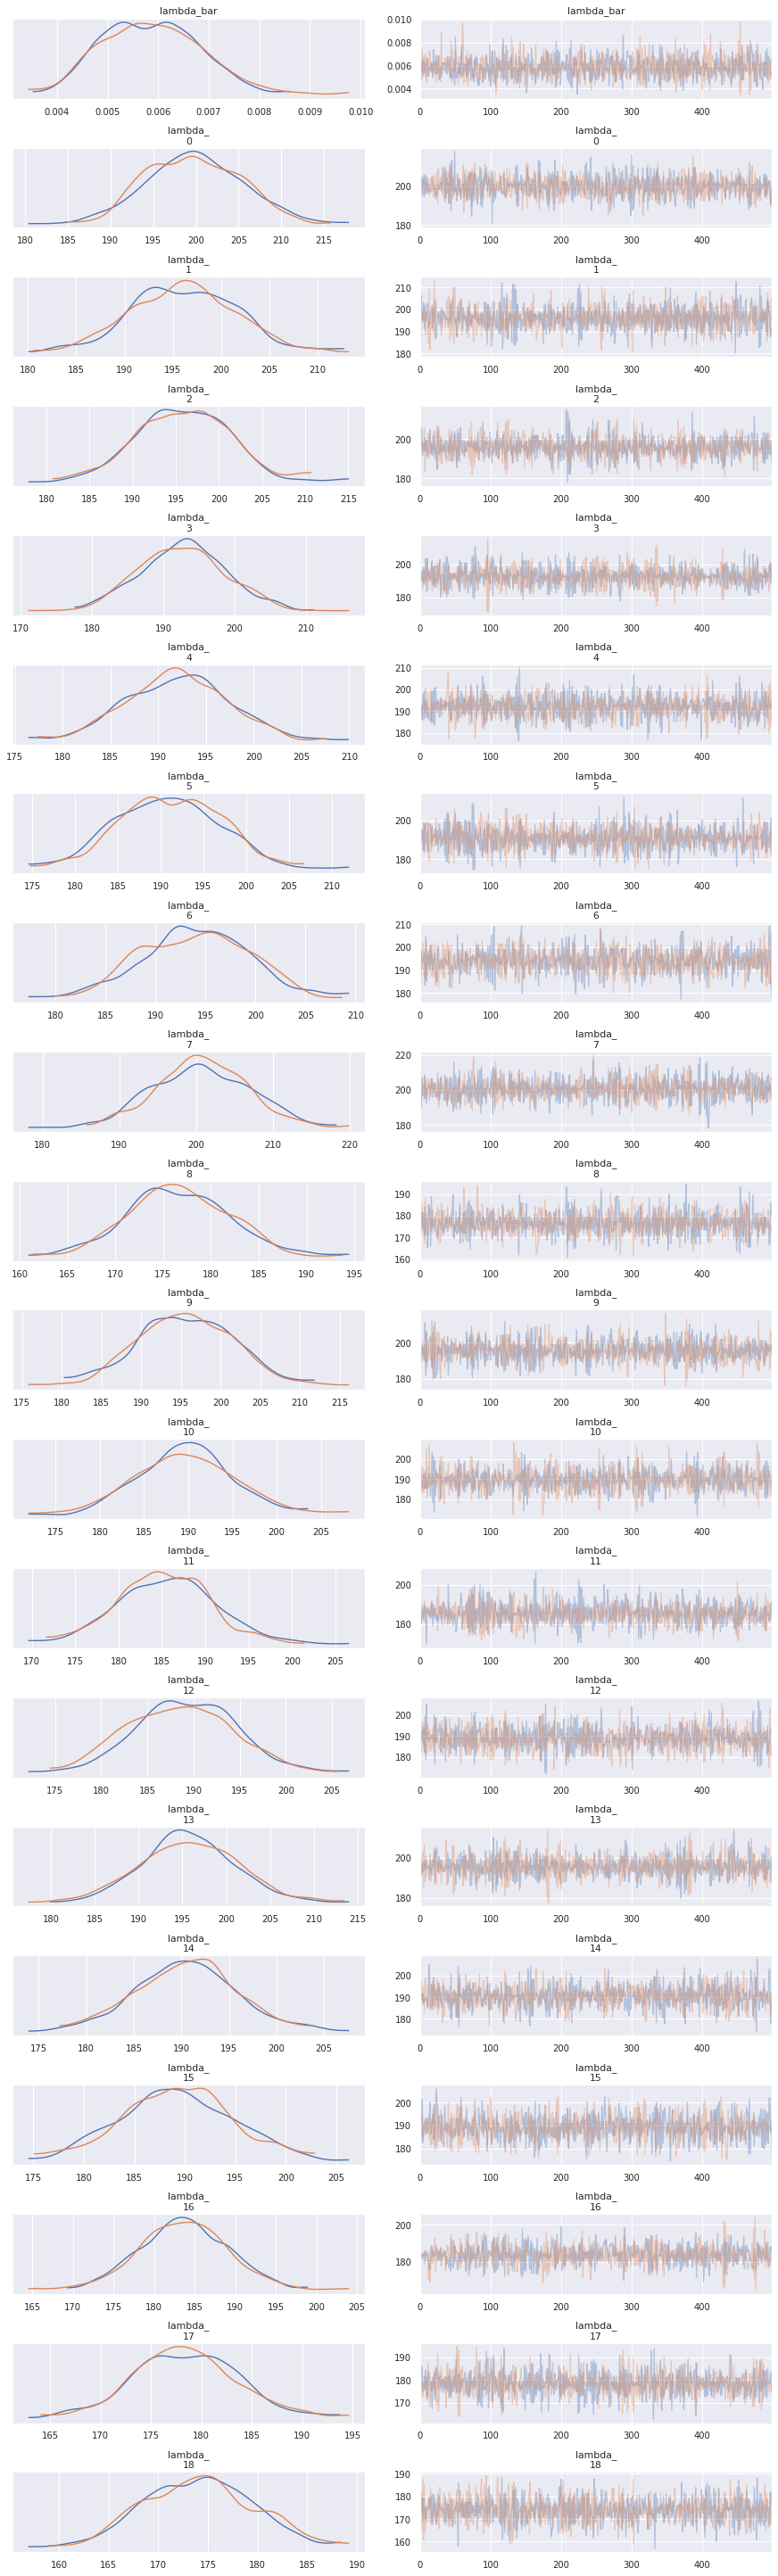

In [98]:
import pymc3 as pm
import arviz as az

year_idx = data['year_idx'].values
week_idx = data['week_idx'].values

model = pm.Model()
with model:
    
    lambda_bar = pm.Exponential('lambda_bar',1 / data['dead_per_M'].mean())
    lambda_ = pm.Exponential('lambda_',lambda_bar,shape=len(unique_weeks))
    lkh = pm.Poisson('lkh', lambda_[week_idx],observed=data['dead_per_M'])
    
    trace = pm.sample(500,tune=500)
    result = pm.trace_to_dataframe(trace)
    print (az.summary(trace,hdi_prob=0.89))
    _= az.plot_trace(trace)

In [99]:
result = result.iloc[:,1:]
result.describe()


,lambda___0,lambda___1,lambda___2,lambda___3,lambda___4,lambda___5,lambda___6,lambda___7,lambda___8,lambda___9,...,lambda___24,lambda___25,lambda___26,lambda___27,lambda___28,lambda___29,lambda___30,lambda___31,lambda___32,lambda___33
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,199.718543,196.099142,195.862145,192.662648,191.940000,190.947421,193.979425,200.676319,176.574007,195.580125,...,156.500753,158.930633,162.284607,158.949645,158.714933,159.288346,159.058397,155.979942,154.478866,153.801660
std,5.501014,5.528226,5.482938,6.116875,5.238615,6.091040,5.353979,6.109451,5.347109,6.104151,...,4.984606,5.286648,5.260618,5.205327,5.044238,5.346831,5.180322,4.942407,4.817399,4.943212
min,180.425460,180.093568,177.970617,171.137387,176.442197,174.572572,177.307783,178.186496,160.950687,175.848177,...,141.467333,143.627687,147.495956,142.221226,140.782612,138.240472,142.184468,139.417143,138.943552,140.315769
25%,195.666809,192.228481,192.141773,188.564515,188.308219,186.690431,190.228293,196.381866,173.030536,191.407915,...,152.909362,155.490352,158.999160,155.330710,155.375071,155.701596,155.716948,152.738912,151.197427,150.443585
50%,199.638387,195.975907,195.877030,192.719311,192.003783,190.863319,194.122883,200.553742,176.344312,195.564903,...,156.598005,158.851257,162.240234,159.118767,158.583874,159.319607,158.884956,155.932152,154.549672,153.647562
75%,203.630860,199.782867,199.539378,196.508259,195.327930,195.064330,197.735258,204.941354,180.126980,199.910682,...,159.887743,162.418499,165.564479,162.405769,161.958197,163.002811,162.530103,159.368023,157.759677,157.111530
max,217.885593,213.184806,215.025603,215.950720,209.940995,211.994215,209.303085,219.873498,194.378352,216.120318,...,171.958610,174.651131,180.778137,177.043390,175.203886,175.464495,177.477929,173.603827,169.956309,168.735303


In [100]:
result.columns = range(len(week_idx_map))
result.describe()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,199.718543,196.099142,195.862145,192.662648,191.940000,190.947421,193.979425,200.676319,176.574007,195.580125,...,156.500753,158.930633,162.284607,158.949645,158.714933,159.288346,159.058397,155.979942,154.478866,153.801660
std,5.501014,5.528226,5.482938,6.116875,5.238615,6.091040,5.353979,6.109451,5.347109,6.104151,...,4.984606,5.286648,5.260618,5.205327,5.044238,5.346831,5.180322,4.942407,4.817399,4.943212
min,180.425460,180.093568,177.970617,171.137387,176.442197,174.572572,177.307783,178.186496,160.950687,175.848177,...,141.467333,143.627687,147.495956,142.221226,140.782612,138.240472,142.184468,139.417143,138.943552,140.315769
25%,195.666809,192.228481,192.141773,188.564515,188.308219,186.690431,190.228293,196.381866,173.030536,191.407915,...,152.909362,155.490352,158.999160,155.330710,155.375071,155.701596,155.716948,152.738912,151.197427,150.443585
50%,199.638387,195.975907,195.877030,192.719311,192.003783,190.863319,194.122883,200.553742,176.344312,195.564903,...,156.598005,158.851257,162.240234,159.118767,158.583874,159.319607,158.884956,155.932152,154.549672,153.647562
75%,203.630860,199.782867,199.539378,196.508259,195.327930,195.064330,197.735258,204.941354,180.126980,199.910682,...,159.887743,162.418499,165.564479,162.405769,161.958197,163.002811,162.530103,159.368023,157.759677,157.111530
max,217.885593,213.184806,215.025603,215.950720,209.940995,211.994215,209.303085,219.873498,194.378352,216.120318,...,171.958610,174.651131,180.778137,177.043390,175.203886,175.464495,177.477929,173.603827,169.956309,168.735303


In [101]:
CI = result.quantile([0.055,0.945],axis=0)
CI

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0.055,191.381231,187.403668,187.353595,183.233391,183.614652,181.643297,185.256839,190.975289,168.053306,185.804917,...,148.662052,150.307569,153.832648,150.691017,151.041196,151.054747,150.804849,148.169391,146.950377,146.011471
0.945,208.711857,204.697090,204.247924,202.732597,200.366345,200.218493,202.189453,210.550963,185.111935,205.146438,...,164.772549,167.588366,170.776765,167.155557,166.869903,167.771795,167.852124,163.936198,162.440001,161.469546


In [102]:
errors = np.abs(CI - result.describe().loc['mean'])
errors.loc[:,1:32]

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
0.055,8.695474,8.508550,9.429257,8.325348,9.304124,8.722586,9.701030,8.520702,9.775208,8.733212,...,8.427551,7.838701,8.623064,8.451959,8.258628,7.673737,8.233599,8.253548,7.810551,7.528489
0.945,8.597948,8.385779,10.069949,8.426345,9.271072,8.210028,9.874645,8.537928,9.566313,9.050813,...,8.754730,8.271796,8.657733,8.492158,8.205913,8.154970,8.483449,8.793727,7.956256,7.961135


Text(0, 0.5, 'deaths per million')

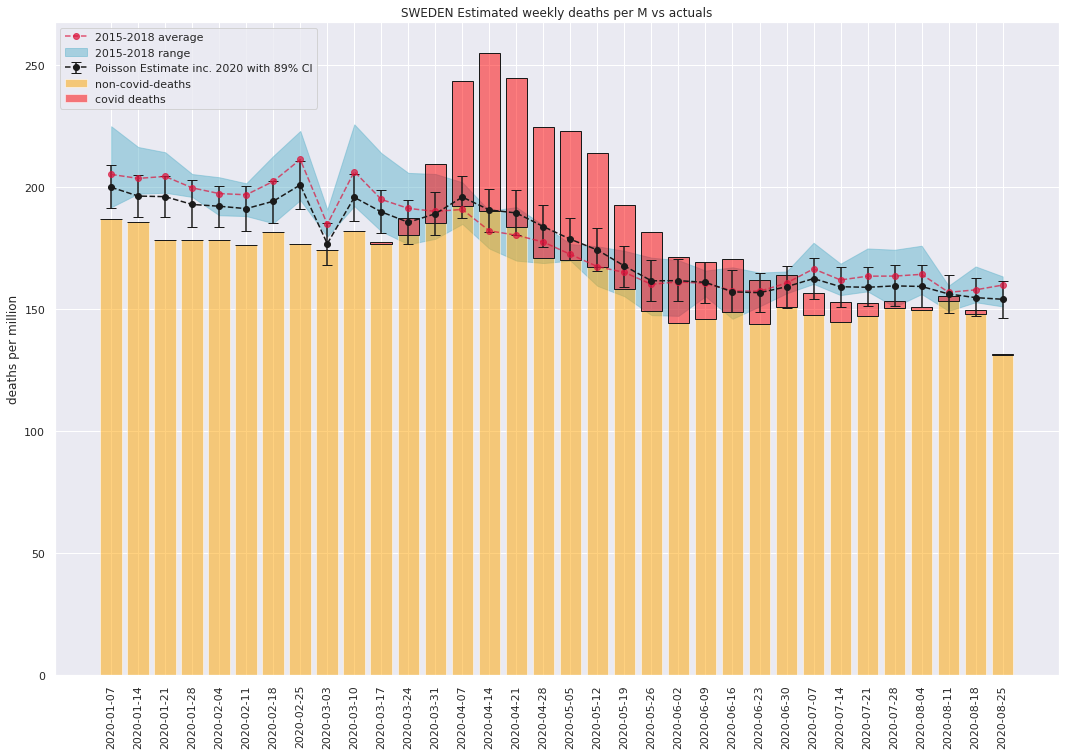

In [103]:
plt.figure(figsize=(18,12))
plt.title('SWEDEN Estimated weekly deaths per M vs actuals')

plt.errorbar(result.columns,result.mean(),errors.values,fmt='o--',capsize=5,color='k',
            label='Poisson Estimate inc. 2020 with 89% CI')

plt.bar(result.columns,weekly_pop_adjusted_deaths['non_covid_dead'],alpha=0.5,color='orange',
        label='non-covid-deaths')

_=plt.xticks(range(len(result.columns)),weekly_pop_adjusted_deaths.index,rotation=90)

plt.bar(result.columns,weekly_pop_adjusted_deaths['covid_dead'],alpha=0.5,color='red',
        bottom=weekly_pop_adjusted_deaths['non_covid_dead'],label='covid deaths')

plt.bar(result.columns,weekly_pop_adjusted_deaths['covid_dead'],
        bottom=weekly_pop_adjusted_deaths['non_covid_dead'],edgecolor='k',alpha=1,fill=False)

plt.fill_between(result.columns,weekly_pop_adjusted_deaths['min'],weekly_pop_adjusted_deaths['max'],
                color='c',alpha=0.5,label='2015-2018 range')

plt.plot(result.columns,weekly_pop_adjusted_deaths['2015-2018'],'o--',color='crimson',alpha=0.7,
        label='2015-2018 average')

plt.legend(loc='upper left')
plt.ylabel('deaths per million')